In [1]:
print ("{:^100s}".format("Hello Everybody!!1111!!!!!!!!"))
#print ("Hello Everybody!!1111!!!!!!!!".center(110))

                                   Hello Everybody!!1111!!!!!!!!                                    


In [2]:
#%matplotlib qt5
import pandas as pd
import numpy as np
import datetime as dt
from __future__ import absolute_import
from sklearn.metrics import confusion_matrix
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader.data import DataReader 
import matplotlib.pyplot as plt
from numpy import loadtxt, where
#%matplotlib notebook
end = dt.datetime.now()
start = end - dt.timedelta (days = 5 * 356)
df = DataReader("MU","iex",start, end)

5y


In [3]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
df['year'] = df.index.year.values
df['month'] = df.index.month.values
df['day'] = df.index.day.values
df['date'] = df['year'].astype(str)+ '-' +df['month'].astype(str) + '-' + df['day'].astype(str)

In [4]:
def count_momentum(dataFrame, periods, column_close='close'):
    dataFrame['Momentum'] = np.nan
    for i, (index, row) in enumerate(df.iterrows()):
        if i >= periods:
            previous_value = df.loc[df.index[i-periods], column_close]
            current_value = df.loc[df.index[i], column_close]
            final_value = (current_value - previous_value)
            dataFrame.at[index, 'Momentum'] = final_value

    return dataFrame

#ROC (rate of change)	Ct/C(t−n) × 100,
def ROC(dataFrame, periods, column_close='close'):
    dataFrame['ROC'] = np.nan
    for i, (index, row) in enumerate(df.iterrows()):
        if i >= periods :
            momentum = dataFrame.at[index,'Momentum']
            shift_value = df.loc[df.index[ i - periods ], column_close]
            ROC = momentum / shift_value
            dataFrame.at[index, 'ROC'] = ROC

    return dataFrame

In [5]:
df.head()

,open,high,low,close,volume,year,month,day,date
date,,,,,,,,,
2013-12-09,22.66,23.6700,22.600,23.12,65756702,2013,12,9,2013-12-9
2013-12-10,23.12,23.4385,22.800,23.14,41919491,2013,12,10,2013-12-10
2013-12-11,22.47,22.9100,22.290,22.50,52447475,2013,12,11,2013-12-11
2013-12-12,22.68,23.0900,22.355,22.54,52600226,2013,12,12,2013-12-12
2013-12-13,22.73,23.2000,22.650,23.08,31018671,2013,12,13,2013-12-13


In [6]:
count_momentum(df,4)
ROC(df, 4)
df['label'] = df.close.shift(-1)
df = df.dropna()
df.head()

,open,high,low,close,volume,year,month,day,date,Momentum,ROC,label
date,,,,,,,,,,,,
2013-12-13,22.73,23.20,22.65,23.08,31018671,2013,12,13,2013-12-13,-0.04,-0.001730,22.77
2013-12-16,23.17,23.42,22.66,22.77,35065801,2013,12,16,2013-12-16,-0.37,-0.015990,22.92
2013-12-17,22.85,22.98,22.55,22.92,26694932,2013,12,17,2013-12-17,0.42,0.018667,21.81
2013-12-18,22.49,22.49,20.81,21.81,106635188,2013,12,18,2013-12-18,-0.73,-0.032387,21.62
2013-12-19,21.73,22.28,21.56,21.62,37749438,2013,12,19,2013-12-19,-1.46,-0.063258,22.17


In [7]:
#%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, ElasticNetCV,Ridge
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model



X = np.array(df[['ROC','Momentum','close']])
Y = np.array(df.label)
Y = Y.reshape(-1,1)

#X = np.nan_to_num(X)
#Y = np.nan_to_num(Y)
#scaler = preprocessing.StandardScaler().fit(Y)
#X = scaler.transform(X)
#Y = scaler.transform(Y)

In [8]:
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.model_selection import train_test_split
import datetime

#train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#%time df['date'] = pd.to_datetime(df.index) 


tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    date_train, date_test = df.date[train_index], df.date[test_index]

In [9]:
#y_test, forcast_set = linear.predict(X_test), date_test
#dataFrame = pd.DataFrame({'Actual':y_test.ravel(),'Predicted':forcast_set, 'date':date_test})
#dataFrame.head()

In [10]:
#y_test, forcast_set = linear.predict(X_test), date_test
dataFrame = pd.DataFrame({'Actual':y_test.ravel(), 'd':date_test})
dataFrame.reset_index(inplace = True)
dataFrame.index = pd.to_datetime(dataFrame.index, format='%Y-%m-%d')
dataFrame['year'] = dataFrame.index.year
dataFrame.drop(columns=['d'], axis=1, inplace=True)
dataFrame.head()

,date,Actual,year
1970-01-01 00:00:00.000000000,2018-01-02,44.98,1970
1970-01-01 00:00:00.000000001,2018-01-03,46.88,1970
1970-01-01 00:00:00.000000002,2018-01-04,45.80,1970
1970-01-01 00:00:00.000000003,2018-01-05,45.55,1970
1970-01-01 00:00:00.000000004,2018-01-08,42.97,1970


In [11]:
#dataFrame.plot(x='date', y=["Actual", "Forcast"], figsize=(10,8))
#DF = dataFrame[['Forcast','Actual','year','date']].copy()

import matplotlib.pyplot as plt
import pandas as pd

def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        return None

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    if x<line1[0][0] or x>line1[1][0] or x<line2[0][0] or x>line2[1][0]:
        return None
    return x, y

def poly_intersection(poly1, poly2):
    intersections = list()
    for i, p1_first_point in enumerate(poly1[:-1]):
        p1_second_point = poly1[i + 1]

        for j, p2_first_point in enumerate(poly2[:-1]):
            p2_second_point = poly2[j + 1]
            res = line_intersection((p1_first_point, p1_second_point), (p2_first_point, p2_second_point))
            if res is not None:
                intersections.append(res)

    return intersections

def get_intersections_from_dataframe(data):
    poly1 = list()
    poly2 = list()
    date = matplotlib.dates.date2num(data.date)
    Actual = data['Actual']
    Forcast = data['Forcast']
    #converting into polylines
    for x,y1,y2 in zip(date, Actual, Forcast):
        poly1.append((x,y1))
        poly2.append((x, y2))
    return poly_intersection(poly1, poly2)


def count_pi (dataFrame, column_actual='Actual', column_predicted = 'Forcast'):
    #dataFrame['Pi'] = np.nan
    for i, (index, row) in enumerate(dataFrame.iterrows()):
        
        current_Actual = dataFrame.loc[dataFrame.index[i], 'Actual']
        prev_Actual = dataFrame.loc[dataFrame.index[i - 1 ], 'Actual']
        current_Forcast = dataFrame.loc[dataFrame.index[i], 'Forcast']
        prev_Forcast = dataFrame.loc[dataFrame.index[i - 1], 'Forcast']
        #Actual_Momentum
        Act_sub = current_Actual -  prev_Actual
        dataFrame.at[index, 'Actual_Momentum'] = Act_sub
        #Predicted_Momentum
        Pre_sub = current_Forcast -  prev_Forcast
        dataFrame.at[index, 'Forcast_Momentum'] = Pre_sub
        Multi = Act_sub * Pre_sub
        Prev_mom_act = dataFrame.loc[dataFrame.index[i-1], 'Actual_Momentum']
        Prev_mom_for = dataFrame.loc[dataFrame.index[i-1], 'Forcast_Momentum']
        
        
        min_value = dataFrame[dataFrame['Actual'] == min(dataFrame['Actual'])].Actual.values[0]
        max_value = dataFrame[dataFrame['Actual'] == max(dataFrame['Actual'])].Actual.values[0]
        
        if current_Actual >= max_value:
            dataFrame.at[index, 'Optimal_Decision'] = "Sell"
        elif current_Actual <= min_value :
            dataFrame.at[index, 'Optimal_Decision'] = "Buy"
        else:
            dataFrame.at[index, 'Optimal_Decision'] = "Hold"

        if Act_sub > 0 and Prev_mom_act < 0:
            dataFrame.at[index, 'Actual_Decision'] = "Buy"   
        if Act_sub >= 0 and Prev_mom_act >= 0:
            dataFrame.at[index, 'Actual_Decision'] = "Hold"
            #dataFrame.at[index, 'Actual_Cost'] = current_Actual
        if Act_sub < 0 and Prev_mom_act > 0:
            dataFrame.at[index, 'Actual_Decision'] = "Sell"
        if Act_sub <= 0 and Prev_mom_act <= 0:
            dataFrame.at[index, 'Actual_Decision'] = "Hold"   
        if Pre_sub > 0 and Prev_mom_for < 0:
            dataFrame.at[index, 'Forcast_Decision'] = "Buy"   
        if Pre_sub >= 0 and Prev_mom_for >= 0:
            dataFrame.at[index, 'Forcast_Decision'] = "Hold"
            #dataFrame.at[index, 'Actual_Cost'] = current_Actual
        if Pre_sub < 0 and Prev_mom_for > 0:
            dataFrame.at[index, 'Forcast_Decision'] = "Sell"
        if Pre_sub <= 0 and Prev_mom_for <= 0:
            dataFrame.at[index, 'Forcast_Decision'] = "Hold"  
        if Multi > 0 :
            dataFrame.at[index, 'Pi'] = 1
            
        else:
            dataFrame.at[index, 'Pi'] = 0
    return dataFrame



def count_profit_loss(dataFrame):
    dataFrame['PL_Actual'] = 0.0
    dataFrame['Cost'] = 0.0

    for i, (index, row) in enumerate(dataFrame.iterrows()):
        
        current_AD = dataFrame.loc[dataFrame.index[i], 'Actual_Decision']
        current_A = dataFrame.loc[dataFrame.index[i], 'Actual'] 
        prev_pl  = dataFrame.loc[dataFrame.index[i-1], 'PL_Actual']
        if current_AD == 'Buy':
            dataFrame.at[index, 'Cost'] = current_A 
            dataFrame.at[index, 'PL_Actual'] = prev_pl 
        elif current_AD == 'Hold':
             dataFrame.at[index, 'PL_Actual'] = prev_pl 
        elif current_AD == 'Sell':
            prev_pl  = dataFrame.loc[dataFrame.index[i-1], 'PL_Actual']
            curr_val = dataFrame[dataFrame.index <= index].iloc[::-1].Actual.values[:1][0]
            d = dataFrame[dataFrame.index < index].iloc[::-1]
            for j, (indx, rw) in enumerate(d.iterrows()):
                act_dec = d.loc[d.index[j], 'Actual_Decision']
                if  act_dec =="Hold":
                    continue
                if act_dec =='Buy':
                    act_val = d.loc[d.index[j], 'Actual']
                    if prev_pl == np.nan:
                        dataFrame.at[index, 'PL_Actual'] = curr_val - act_val 
                    elif prev_pl != np.nan:
                        
                        output = (curr_val - act_val) + prev_pl
                        dataFrame.at[index, 'PL_Actual'] = output
                    break
                else:
                    break
    return dataFrame
                

#TN=Predicted Sell and label is Sell
#TP=Predicted Buy and label is Buy
#FN= Predicted Sell but label is Buy
#FP=Predicted Buy but label is Sell

def get_confusion_matrix(y_test, y_pred):
    TP = FP = TN = FN = 0
    for i in range(len(y_pred)): 
        if y_test[i] == y_pred[i] == 'Buy':
            TP += 1
        #newly addedline
        #---------------
        if y_pred[i] == 'Buy' and y_test[i]!=y_pred[i]:
            FP += 1
        if y_test[i] == y_pred[i]== 'Sell':
            TN += 1
        if y_pred[i] =='Sell'  and y_test[i] !=y_pred[i]:
            FN += 1
    
    confusion_list = ["True positive", "False positive", "False negative","True negative"]
    row_format ="{:>15}" * (len(confusion_list) + 1)
    print ("{:>66}".format("--------------------------"))
    print("{:^107s}".format("My Confusion Matrix"))
    print ("{:>66}".format("--------------------------"))
    print ("{:>85}".format(row_format.format("", *confusion_list)))
    data = [TP, FP, FN, TN]
    print ("{:>75}".format(row_format.format("", *data )))
    print('\n')
    
    #TP = print("{:>60}".format('True positive  = '),TP)
    #FP = print("{:>60}".format('False positive = '),FP)
    #FN = print("{:>60}".format('False negative = '),FN)
    #TN = print("{:>60}".format('True negative  = '),TN)
    return


def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    confusion_list = ["True positive", "False positive", "False negative","True negative"]
    row_format ="{:>15}" * (len(confusion_list) + 1)
    print ("{:>66}".format("--------------------------"))
    print("{:^107s}".format("Optimal Confusion Matrix"))
    print ("{:>66}".format("--------------------------"))
    print ("{:>85}".format(row_format.format("", *confusion_list)))
    data = [cm[0][0],cm[0][1],cm[1][0],cm[1][1]]
    print ("{:>75}".format(row_format.format("", *data )))
    
    #print("{:>60}".format('True positive  = '), cm[0][0])
    #print("{:>60}".format('False positive = '), cm[0][1])
    #print("{:>60}".format('False negative = '), cm[1][0])
    #print("{:>60}".format('True negative  = '), cm[1][1])
    
    
def plot_Forcast(df):
    y = df.Forcast.values
    X = df.date.values
    buy_f  = np.diff(y) > 0
    sell_f = np.diff(y) < 0
    
    #buy_f  = df[df.Forcast_Decision.values =='Buy'].Forcast_Decision.values
    #sell_f = df[df.Forcast_Decision.values =='Sell'].Forcast_Decision.values
    
    y1 = np.ma.masked_array(y[:-1], buy_f)
    y2 = np.ma.masked_array(y[:-1], sell_f)
    plt.figure(figsize=(20,10))
    plt.plot(X[:-1], y1, 'kv', color= 'r')
    plt.plot(X[:-1], y2, 'k^', color= 'g')
    plt.plot(X,y, label='Forcast', color='m')
    plt.legend(loc='upper right',fontsize='15')
    plt.title('Forcast decision',fontsize=20)
#plot_Forcast(dataFrame)

def plot_Actual(df):
    Y = df.Actual.values
    X = df.date.values
    buy_act  = np.diff(Y) > 0
    sell_act = np.diff(Y) < 0
    
    #buy_act  = df[df.Actual_Decision.values =='Buy'].Actual_Decision.values
    #sell_act = df[df.Actual_Decision.values =='Sell'].Actual_Decision.values
    
    Y1 = np.ma.masked_array(Y[:-1], buy_act )
    Y2 = np.ma.masked_array(Y[:-1], sell_act)
    plt.figure(figsize=(20,10))
    plt.plot(X[:-1], Y1, 'kv', color= 'r')
    plt.plot(X[:-1], Y2, 'k^', color= 'g')
    plt.plot(X,Y, label='Actual',color='y')
    plt.legend(loc='upper right',fontsize='15')
    plt.title('Actual decision',fontsize=20)

    
#plot_Actual_Forcast(dataFrame)   
def plot_Actual_Forcast(df):
    Y = df.Actual.values
    y = df.Forcast.values
    X = df.date.values
    buy_f  = np.diff(y) > 0
    sell_f = np.diff(y) < 0
    
    #buy_f  = df[df.Forcast_Decision.values =='Buy'].Forcast_Decision.values
    #sell_f = df[df.Forcast_Decision.values =='Sell'].Forcast_Decision.values
    
    y1 = np.ma.masked_array(y[:-1], buy_f)
    y2 = np.ma.masked_array(y[:-1], sell_f)
    buy_act  = np.diff(Y) > 0
    sell_act = np.diff(Y) < 0
    
    #buy_act  = df[df.Actual_Decision.values =='Buy'].Actual_Decision.values
    #sell_act = df[df.Actual_Decision.values =='Sell'].Actual_Decision.values
    
    Y1 = np.ma.masked_array(Y[:-1], buy_act )
    Y2 = np.ma.masked_array(Y[:-1], sell_act)
    plt.figure(figsize=(20,10))
    plt.plot(X[:-1], Y1, 'kv', color= 'r')
    plt.plot(X[:-1], Y2, 'k^', color= 'g')
    plt.plot(X[:-1], y1, 'kv', color= 'r')
    plt.plot(X[:-1], y2, 'k^', color= 'g')
    plt.plot(X,Y, label='Actual')
    plt.plot(X,y, label='Forcast')
    plt.legend(loc='upper right',fontsize='15')
    plt.title('Actual & Forcast decision',fontsize=20)

In [12]:
#theilSenRegressor_df[theilSenRegressor_df.index <='1970-01-01 00:00:00.000000009']
#theilSenRegressor_df[['Actual','Actual_Decision','PL_Actual']].head(8)

In [13]:
#Symmetric mean absolute percentage error 
import numpy as np
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [14]:
import numpy as np
#MASE / Mean Absolute Scaled Error
#MASE=MAE/(MAEin−sample,naive)
#MASE=∑Tt=1|et|TT−1∑Tt=2∣∣Yt−Yt−1∣∣
def MASE(training_series, testing_series, prediction_series):
    d = np.abs(  np.diff( training_series.ravel()) ).sum()/(len(training_series.ravel())-1)
    errors = (np.abs(testing_series - prediction_series )).mean()
    return errors / d

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       

    print(cm)

    plt.figure(figsize=(16,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [16]:
#%matplotlib notebook
from sklearn.linear_model import Ridge,LassoLars,BayesianRidge
from sklearn.linear_model import ElasticNet, Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import itertools
columns =  ['MASE', 'SMAPE']
dc  = pd.DataFrame(columns = columns)

def get_model(X_train,y_train,X_test,y_test, Model,data,model_name,start_date,end_date):
    
    model = Model()
    model.fit(X_train, y_train.reshape(len(y_train),) )
    model.score(X_test, y_test)
    forcast = model.predict(X_test)
    print("\n")
    print("{:>58}".format('\033[1m' + "Model Name"), model_name.title())
    print("\n")
    smape_value = smape(y_test.ravel(), forcast)
    dc.loc[model_name.title(), 'SMAPE'] = smape_value
    print ("{:>66}".format("--------------------------"))
    #print ("{:>69}".format('\033[0m' + "SMAPE for " + str(model_name).title()+'\n'),"{:>60}".format(smape_value))
    print ("{:>54}".format('\033[0m' + "SMAPE"),"{:.3f}".format(smape_value))
    print ("{:>66}".format("--------------------------"))
    MASE_value = MASE(X_train, X_test.reshape(-1,1),forcast)
    dc.loc[model_name.title(), 'MASE'] = MASE_value
    #print ("{:>64}".format("MASE for " + str(model_name).title()+'\n'), "{:>60}".format(MASE_value))
    print ("{:>49}".format("MASE"), "{:.3f}".format(MASE_value))
    a = "column_number"
    a = 'short'
    b = 'df'
    globals()[model_name +'_'+ b] = data[['Actual','date']].copy()
    globals()[model_name +'_'+ b]['Forcast'] = forcast
    
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    period = globals()[model_name + '_'+ b][globals()[model_name + '_'+ b]['date'].between(start_date, end_date)]
    globals()[model_name +'_'+ a] = pd.DataFrame({'Actual':period.Actual, 'Forcast':period.Forcast ,'date':period.date })
    count_pi(globals()[model_name +'_'+ b])
    count_profit_loss(globals()[model_name +'_'+ b])
    
    count_pi(globals()[model_name +'_'+ a])
    count_profit_loss(globals()[model_name +'_'+ a])
    globals()[model_name +'_'+ a] = globals()[model_name +'_'+ a].dropna()
    globals()[model_name +'_'+ b] = globals()[model_name +'_'+ b].dropna()
    
    Hit_ratio =  globals()[model_name +'_'+ b].Pi.mean() * 100
    print ("{:>66}".format("--------------------------"))
    
    print ("{:>54}".format("Hit_ratio"),"{:.3f}".format(Hit_ratio ,'%'))
    print ("{:>68}".format("--------------------------\n\n"))

    #get_confusion_matrix(globals()[model_name +'_'+ b].Actual_Decision, globals()[model_name +'_'+ b].Forcast_Decision)
    #print_confusion_matrix(globals()[model_name +'_'+ b].Actual_Decision, globals()[model_name +'_'+ b].Forcast_Decision)
    cnf_matrix = confusion_matrix(globals()[model_name +'_'+ b].Actual_Decision, globals()[model_name +'_'+ b].Forcast_Decision,labels=['Buy', 'Sell', 'Hold'])
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Buy', 'Sell', 'Hold'],
                      title='Confusion matrix')
    
    plot_forcast = plot_Forcast(globals()[model_name +'_'+ a]) 
    plot_actual = plot_Actual(globals()[model_name +'_'+ a])
    plot_actual_forcast = plot_Actual_Forcast (globals()[model_name +'_'+ a])
    

    return 





                                            Model Name Ridge


                                        --------------------------
                                             SMAPE 2.233
                                        --------------------------
                                             MASE 2.162
                                        --------------------------
                                             Hit_ratio 52.475
                                        --------------------------


[[0.   0.45 0.55]
 [0.45 0.   0.55]
 [0.24 0.25 0.51]]


<Figure size 432x288 with 0 Axes>

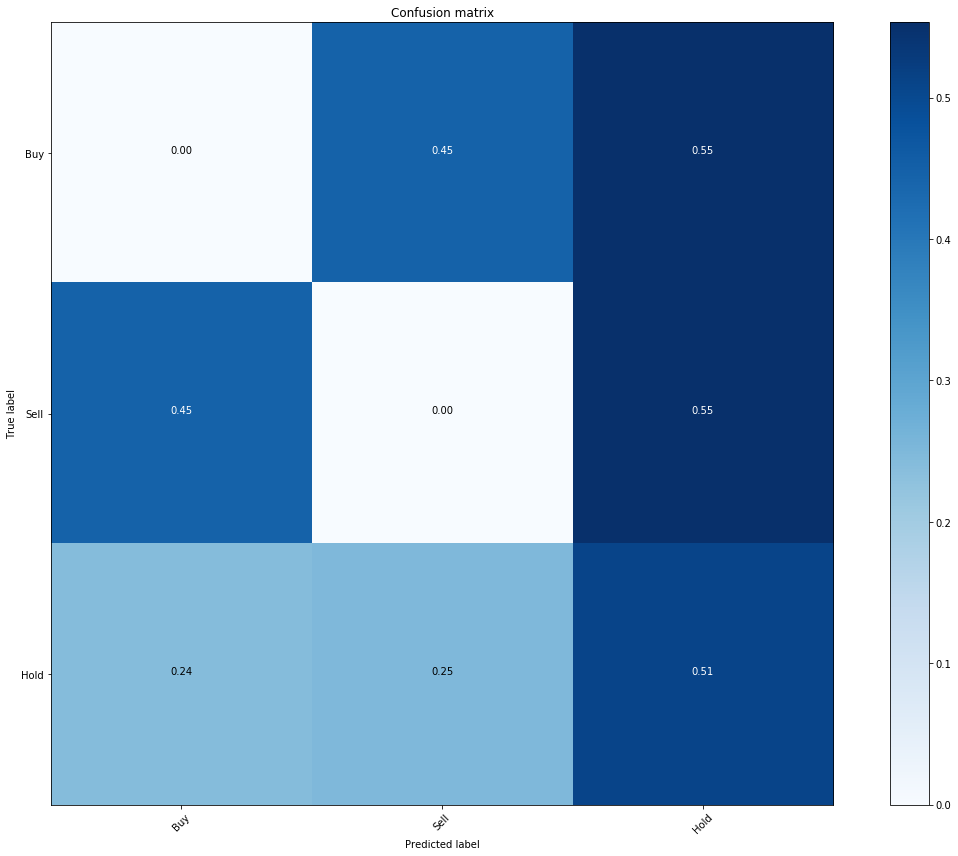

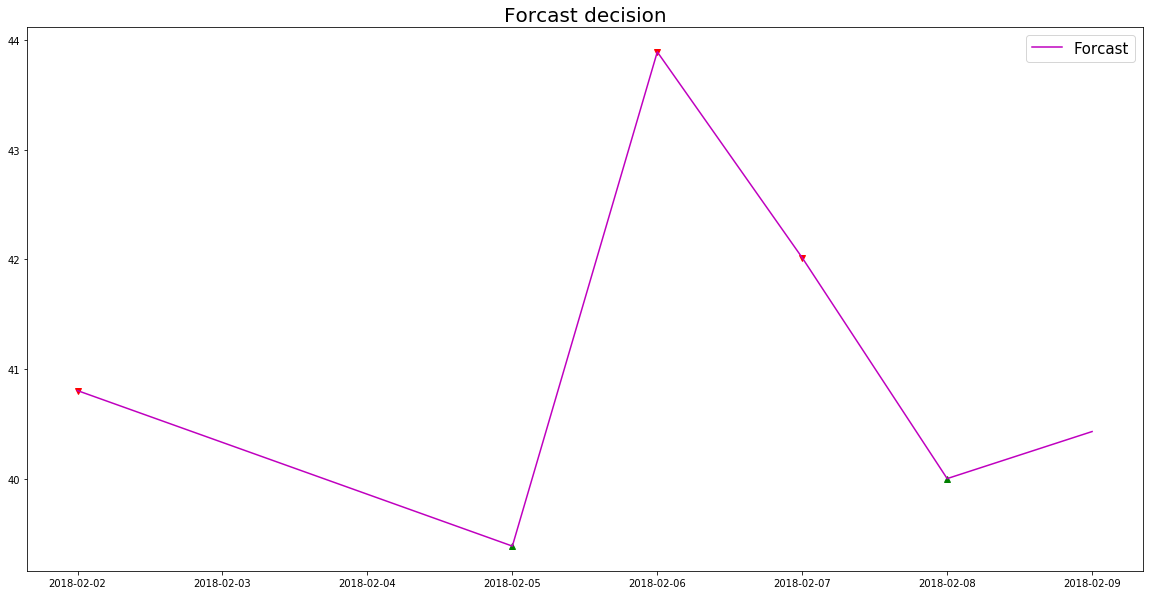

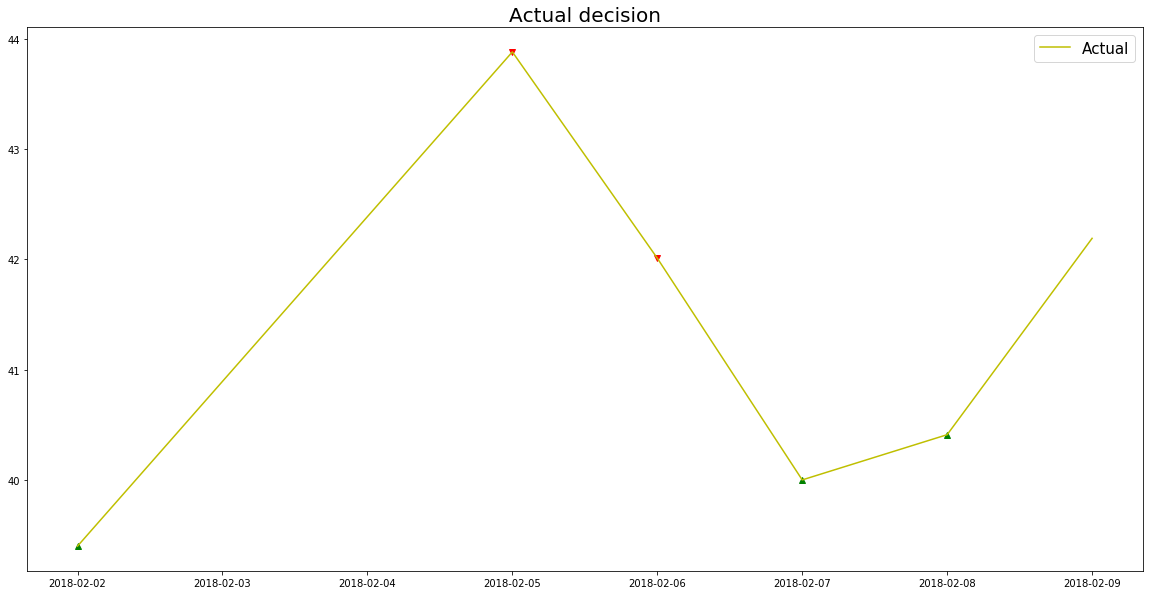

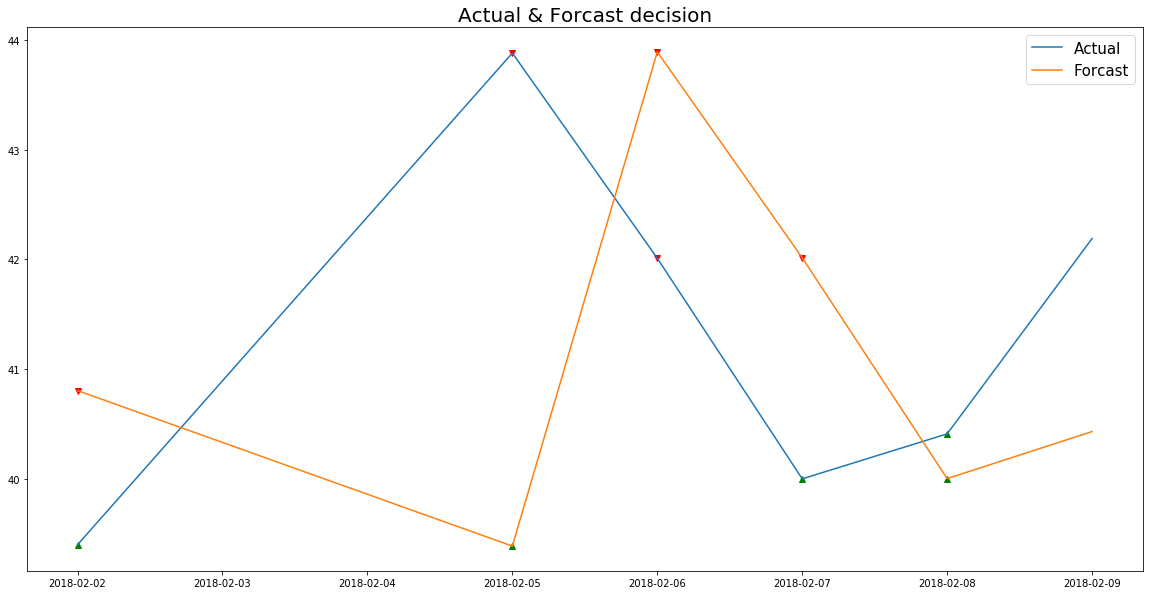

In [17]:
#Ridge is a regression analysis method
#You wil get two data Frames 
#1- a_short Data Frame(for the dates that you chose ...start_date,end_date)--->   ridge_short
#2-a longData Frame (for the whole period)   --------------------->               ridge_df
get_model(X_train,y_train,X_test,y_test, Ridge,dataFrame, 'ridge', start_date ='2018-02-01',end_date ='2018-02-09')        

In [18]:
ridge_df[['Actual','Actual_Momentum','Actual_Decision','Optimal_Decision','Pi','Cost','PL_Actual']].head()

,Actual,Actual_Momentum,Actual_Decision,Optimal_Decision,Pi,Cost,PL_Actual
1970-01-01 00:00:00.000000001,46.88,1.90,Hold,Hold,1.0,0.00,0.0
1970-01-01 00:00:00.000000002,45.80,-1.08,Sell,Hold,0.0,0.00,0.0
1970-01-01 00:00:00.000000003,45.55,-0.25,Hold,Hold,1.0,0.00,0.0
1970-01-01 00:00:00.000000004,42.97,-2.58,Hold,Hold,1.0,0.00,0.0
1970-01-01 00:00:00.000000005,43.31,0.34,Buy,Hold,0.0,43.31,0.0


In [19]:
ridge_short[['Actual','Actual_Momentum','Actual_Decision','Optimal_Decision','Pi','Cost','PL_Actual']].head()

,Actual,Actual_Momentum,Actual_Decision,Optimal_Decision,Pi,Cost,PL_Actual
1970-01-01 00:00:00.000000022,39.40,-1.42,Hold,Buy,1.0,0.00,0.00
1970-01-01 00:00:00.000000023,43.88,4.48,Buy,Sell,0.0,43.88,0.00
1970-01-01 00:00:00.000000024,42.01,-1.87,Sell,Hold,0.0,0.00,-1.87
1970-01-01 00:00:00.000000025,40.00,-2.01,Hold,Hold,1.0,0.00,-1.87
1970-01-01 00:00:00.000000026,40.41,0.41,Buy,Hold,0.0,40.41,-1.87




                                            Model Name Lasso


                                        --------------------------
                                             SMAPE 2.306
                                        --------------------------
                                             MASE 2.148
                                        --------------------------
                                             Hit_ratio 51.485
                                        --------------------------


[[0.   0.45 0.55]
 [0.45 0.   0.55]
 [0.24 0.24 0.52]]


<Figure size 432x288 with 0 Axes>

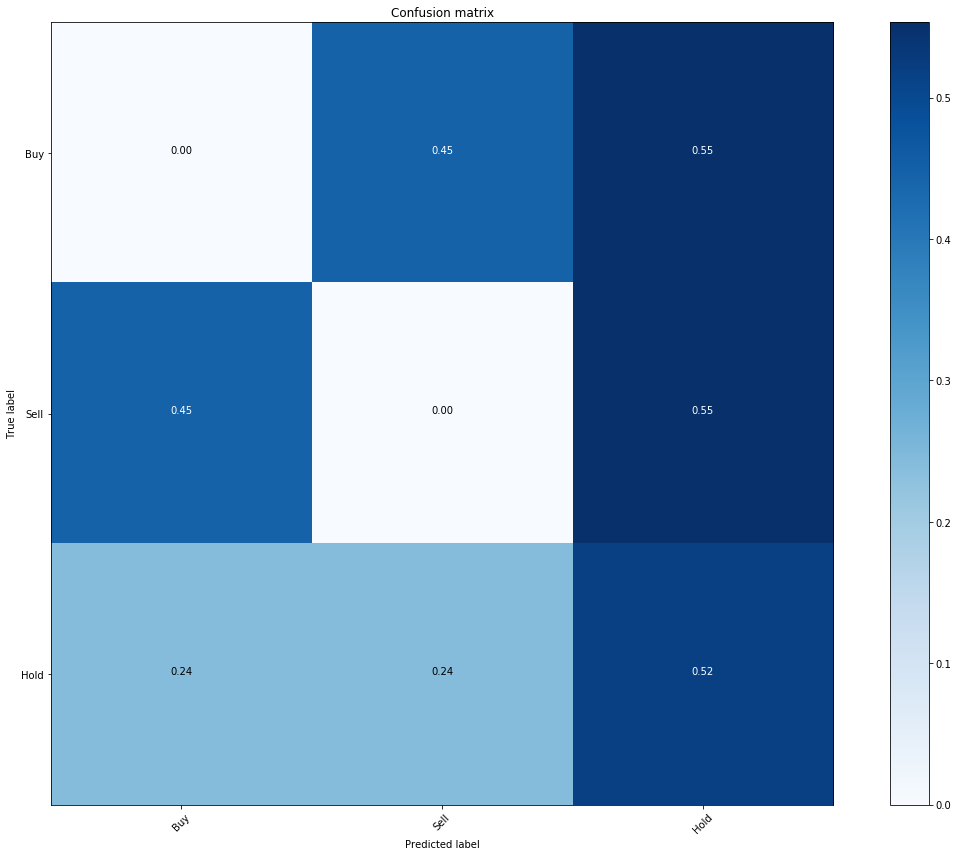

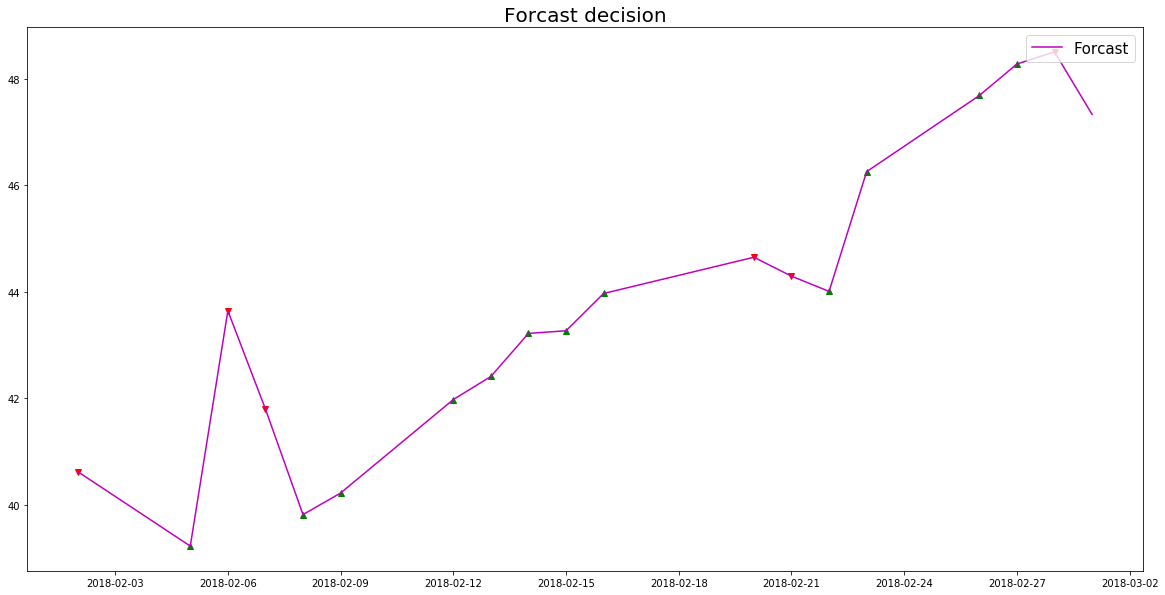

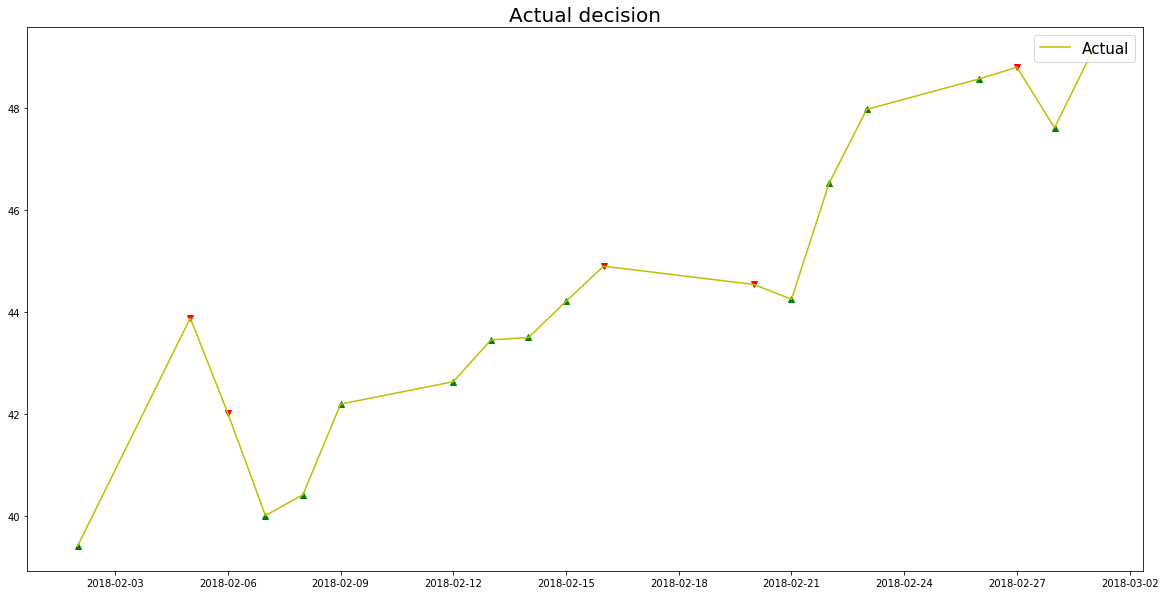

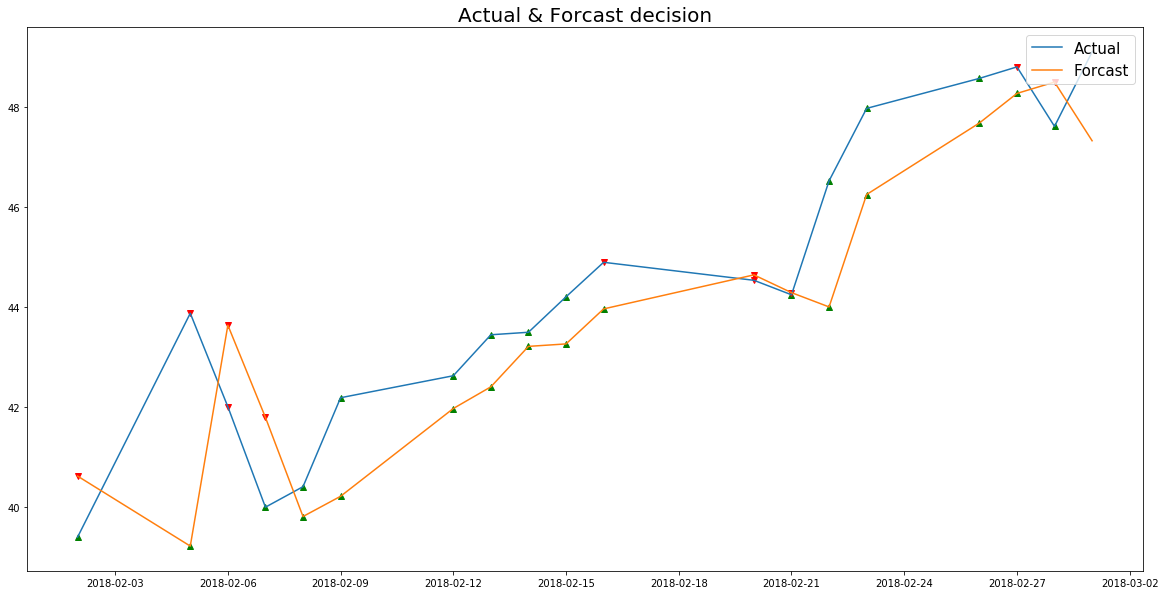

In [20]:
#lasso is a regression analysis method
#You wil get two data Frames 
#1- a_short Data Frame(for the dates that you chose ...start_date,end_date)--->   lasso_short
#2-a longData Frame (for the whole period)   --------------------->               lasso_df
get_model(X_train,y_train,X_test,y_test, Lasso,dataFrame, 'lasso',start_date ='2018-02-01',end_date ='2018-03-01') 



                                            Model Name Linearregression


                                        --------------------------
                                             SMAPE 2.236
                                        --------------------------
                                             MASE 2.162
                                        --------------------------
                                             Hit_ratio 52.475
                                        --------------------------


[[0.   0.45 0.55]
 [0.45 0.   0.55]
 [0.24 0.25 0.51]]


<Figure size 432x288 with 0 Axes>

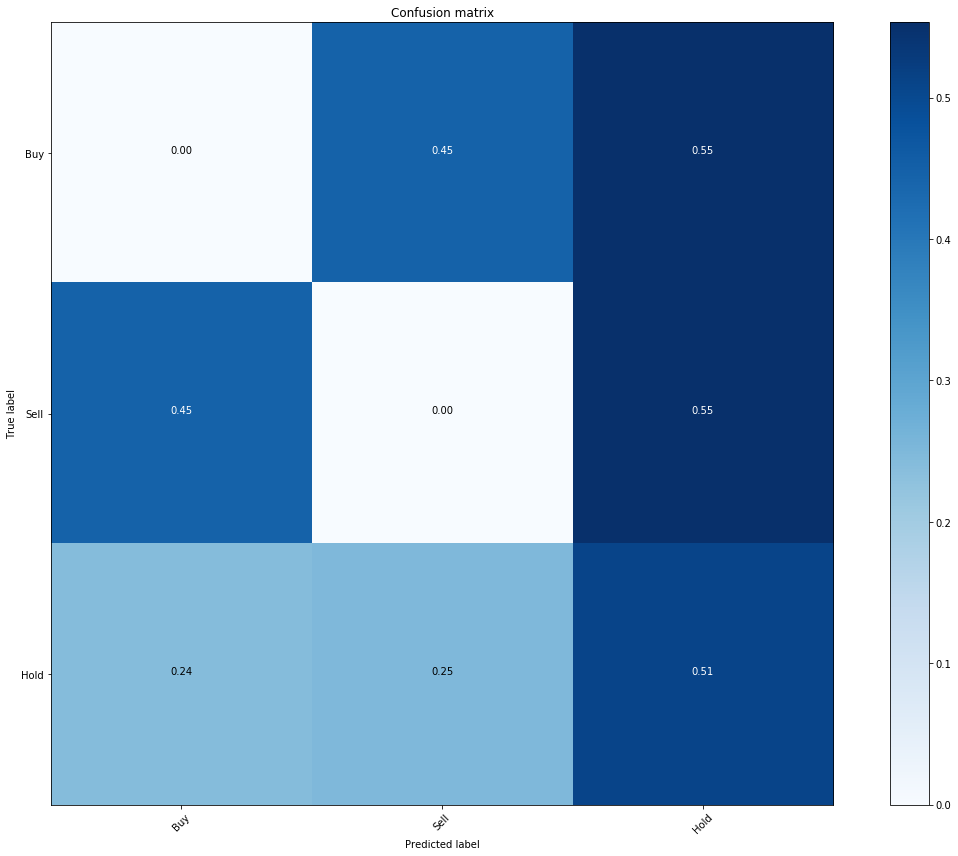

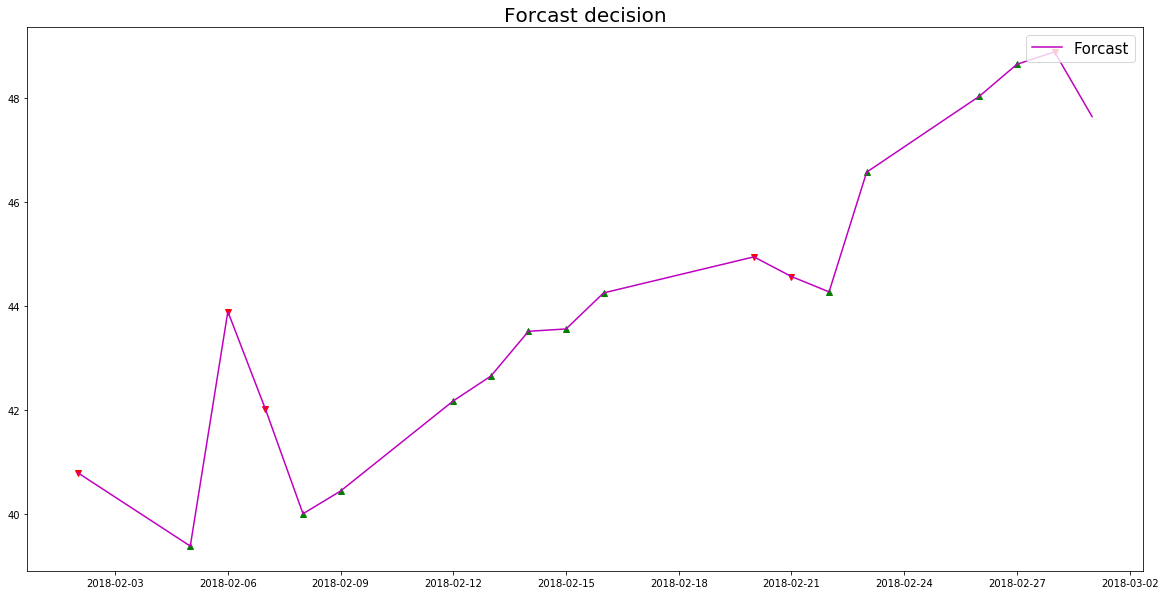

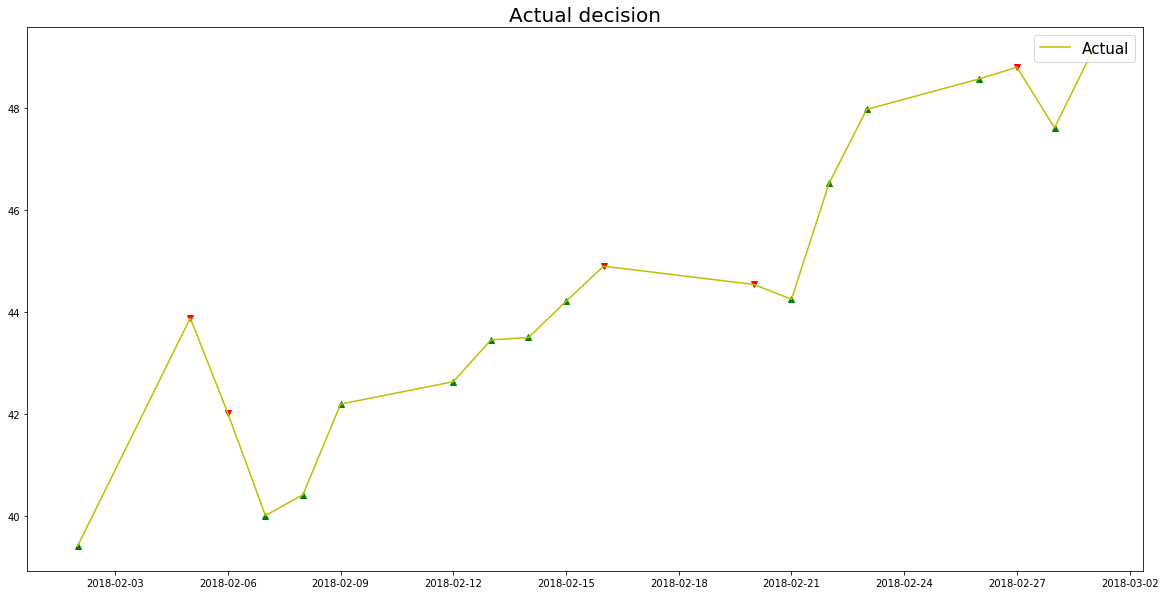

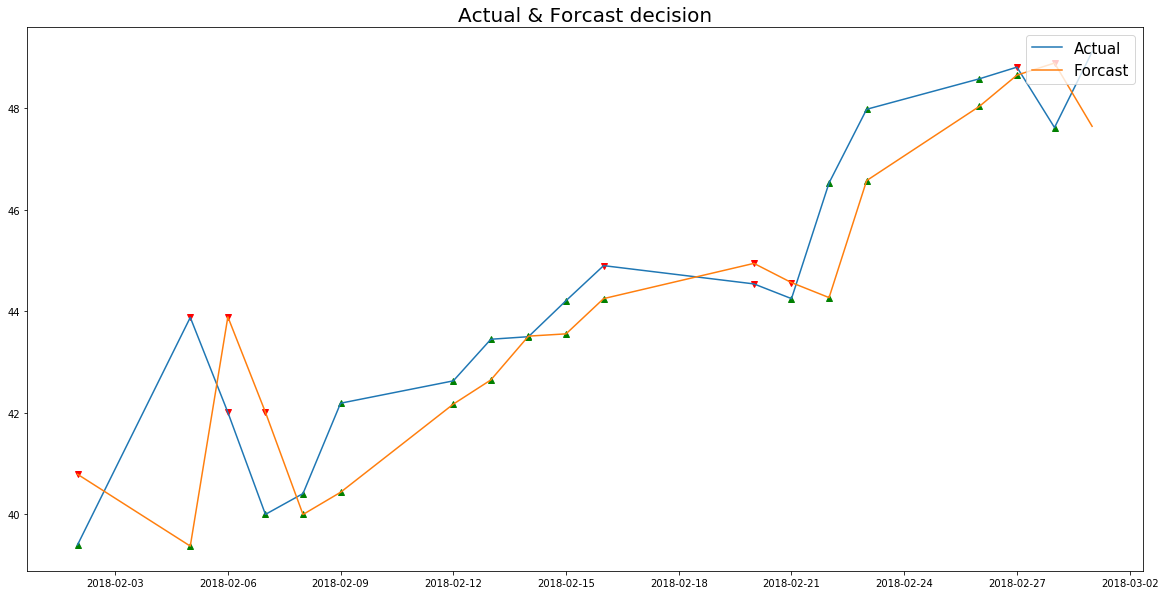

In [21]:
#LinearRegression is a regression analysis method
#You wil get two Data Frames 
#1- a_short Data Frame(for the dates that you chose ...start_date,end_date)--->   linearRegression_short
#2-a longData Frame (for the whole period)   --------------------->               linearRegression_df
get_model(X_train,y_train,X_test,y_test, LinearRegression,dataFrame, 'linearRegression',start_date ='2018-02-01',end_date ='2018-03-01')

In [22]:
lasso_df[['Actual','Actual_Momentum','Actual_Decision','Optimal_Decision','Pi','Cost','PL_Actual']].head()

,Actual,Actual_Momentum,Actual_Decision,Optimal_Decision,Pi,Cost,PL_Actual
1970-01-01 00:00:00.000000001,46.88,1.90,Hold,Hold,1.0,0.00,0.0
1970-01-01 00:00:00.000000002,45.80,-1.08,Sell,Hold,0.0,0.00,0.0
1970-01-01 00:00:00.000000003,45.55,-0.25,Hold,Hold,1.0,0.00,0.0
1970-01-01 00:00:00.000000004,42.97,-2.58,Hold,Hold,1.0,0.00,0.0
1970-01-01 00:00:00.000000005,43.31,0.34,Buy,Hold,0.0,43.31,0.0




                                            Model Name Elasticnet


                                        --------------------------
                                             SMAPE 2.306
                                        --------------------------
                                             MASE 2.148
                                        --------------------------
                                             Hit_ratio 51.485
                                        --------------------------


[[0.   0.45 0.55]
 [0.45 0.   0.55]
 [0.24 0.24 0.52]]


<Figure size 432x288 with 0 Axes>

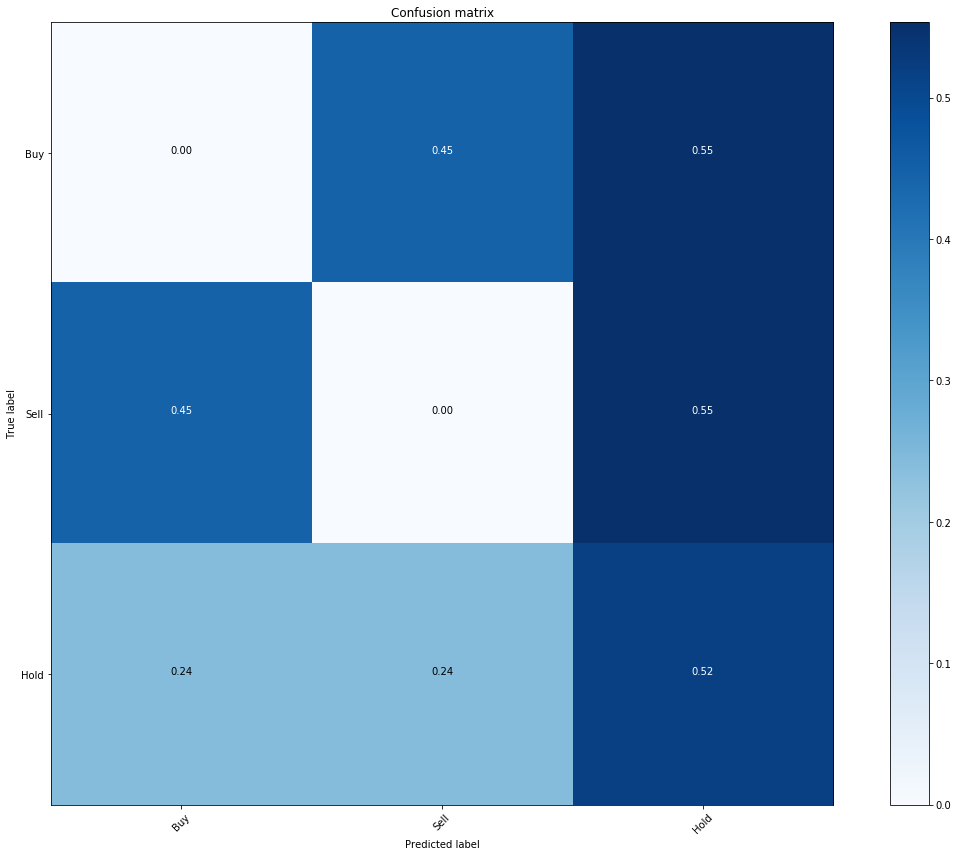

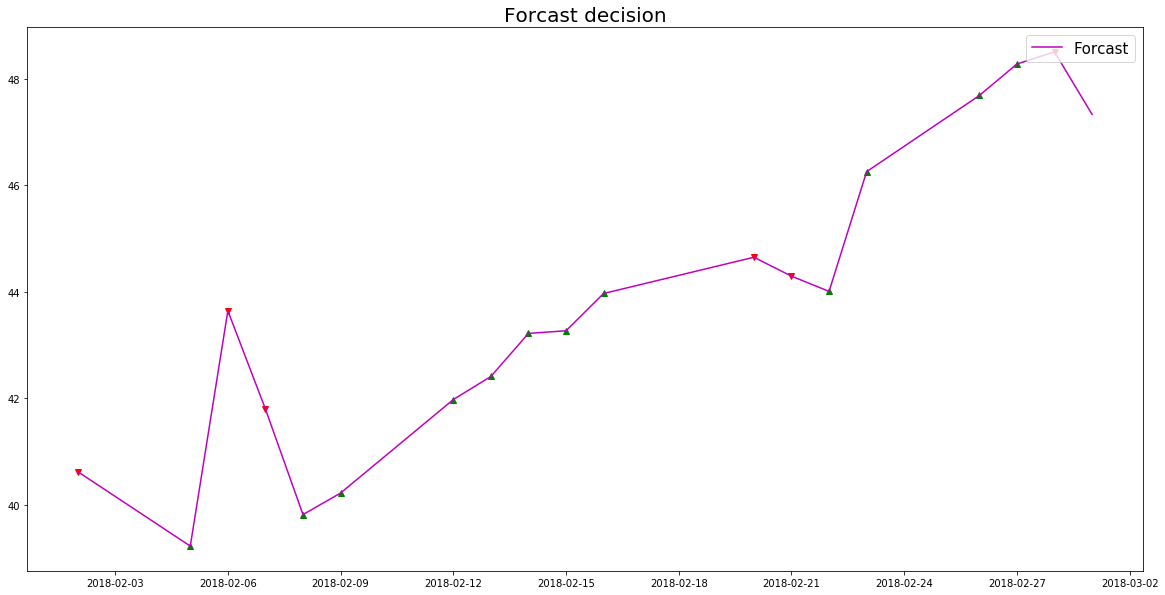

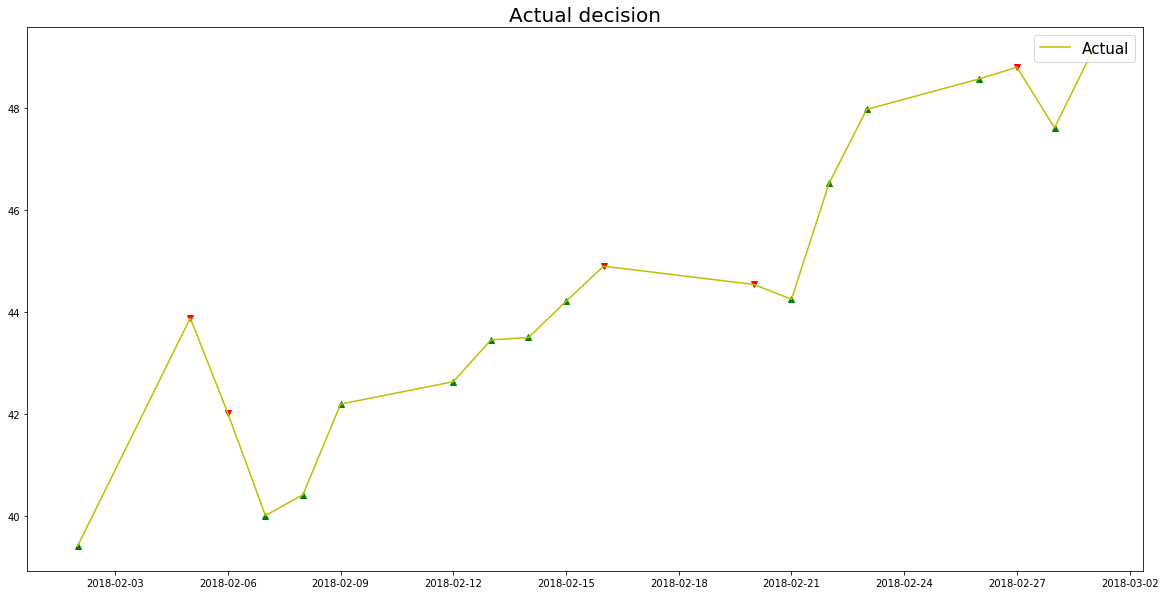

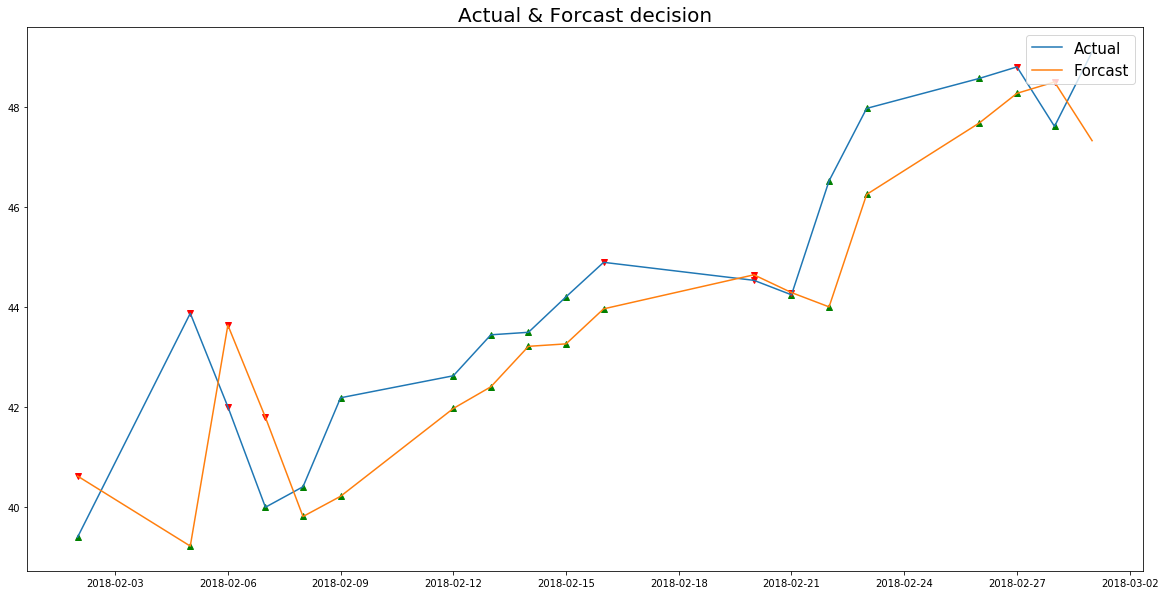

In [23]:
#ElasticNet is a regression analysis method
#You wil get two Data Frames 
#1- a_short Data Frame(for the dates that you chose ...start_date,end_date)--->   elasticNet_short
#2-a longData Frame (for the whole period)   --------------------->               elasticNet_df
get_model(X_train,y_train,X_test,y_test, ElasticNet,dataFrame, 'elasticNet',start_date ='2018-02-01',end_date ='2018-03-01') 

In [24]:
elasticNet_df[['Actual','Actual_Momentum','Actual_Decision','Optimal_Decision','Pi','Cost','PL_Actual']].head()

,Actual,Actual_Momentum,Actual_Decision,Optimal_Decision,Pi,Cost,PL_Actual
1970-01-01 00:00:00.000000001,46.88,1.90,Hold,Hold,1.0,0.00,0.0
1970-01-01 00:00:00.000000002,45.80,-1.08,Sell,Hold,0.0,0.00,0.0
1970-01-01 00:00:00.000000003,45.55,-0.25,Hold,Hold,1.0,0.00,0.0
1970-01-01 00:00:00.000000004,42.97,-2.58,Hold,Hold,1.0,0.00,0.0
1970-01-01 00:00:00.000000005,43.31,0.34,Buy,Hold,0.0,43.31,0.0




                                            Model Name Lassolars


                                        --------------------------
                                             SMAPE 68.270
                                        --------------------------
                                             MASE 1.504
                                        --------------------------
                                             Hit_ratio 0.000
                                        --------------------------


[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


<Figure size 432x288 with 0 Axes>

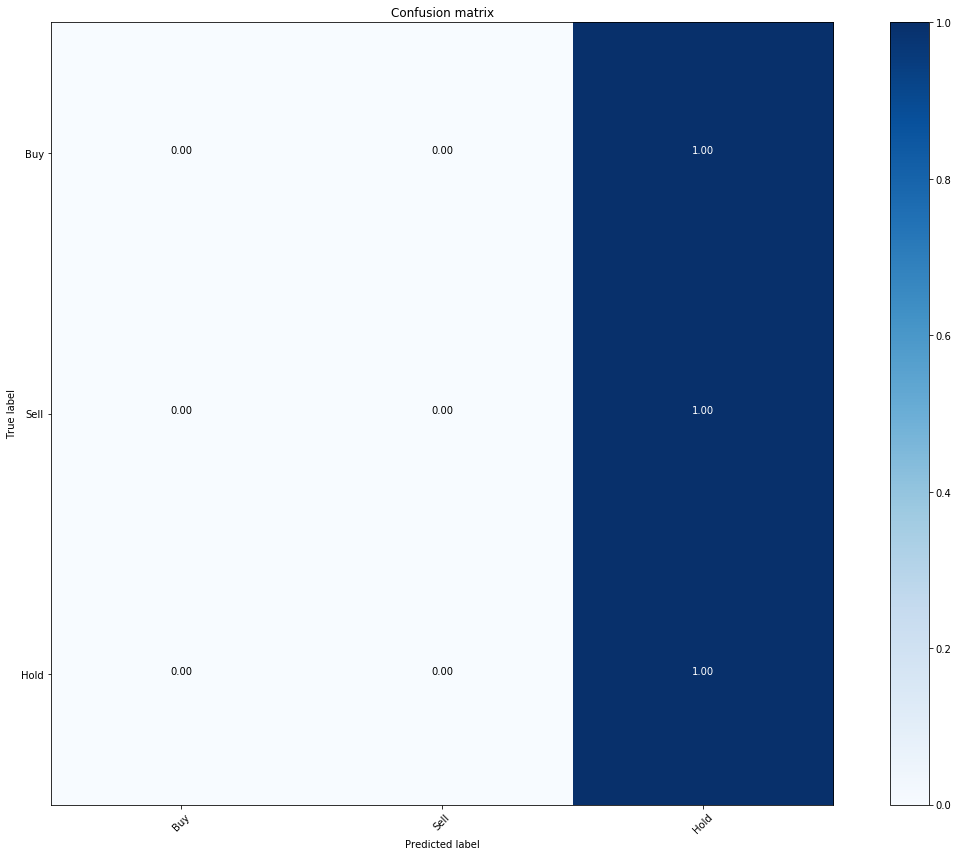

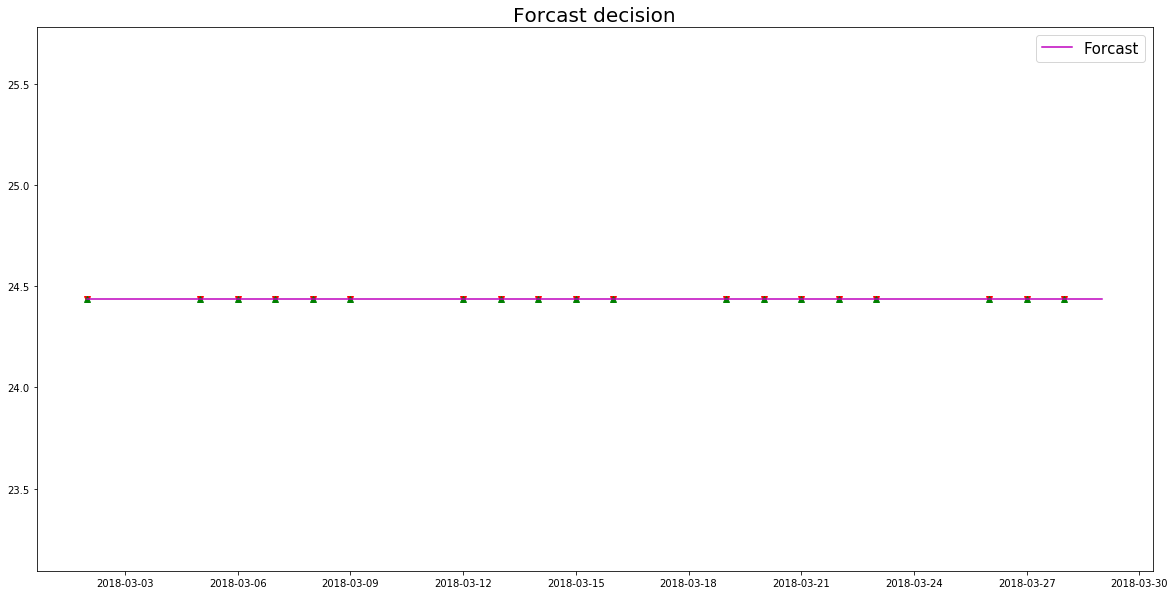

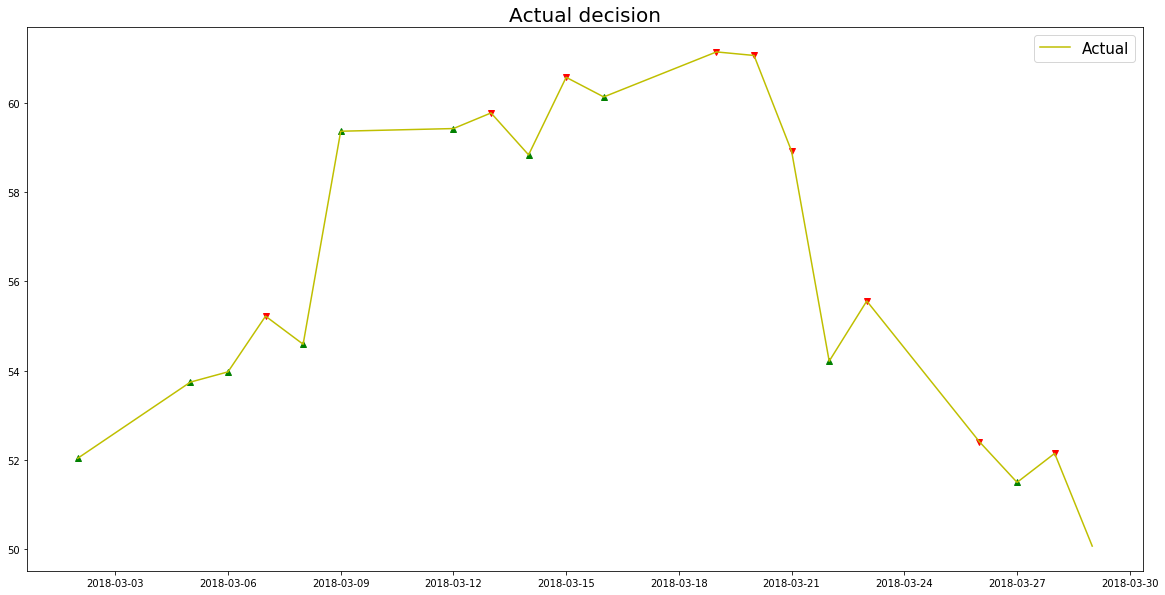

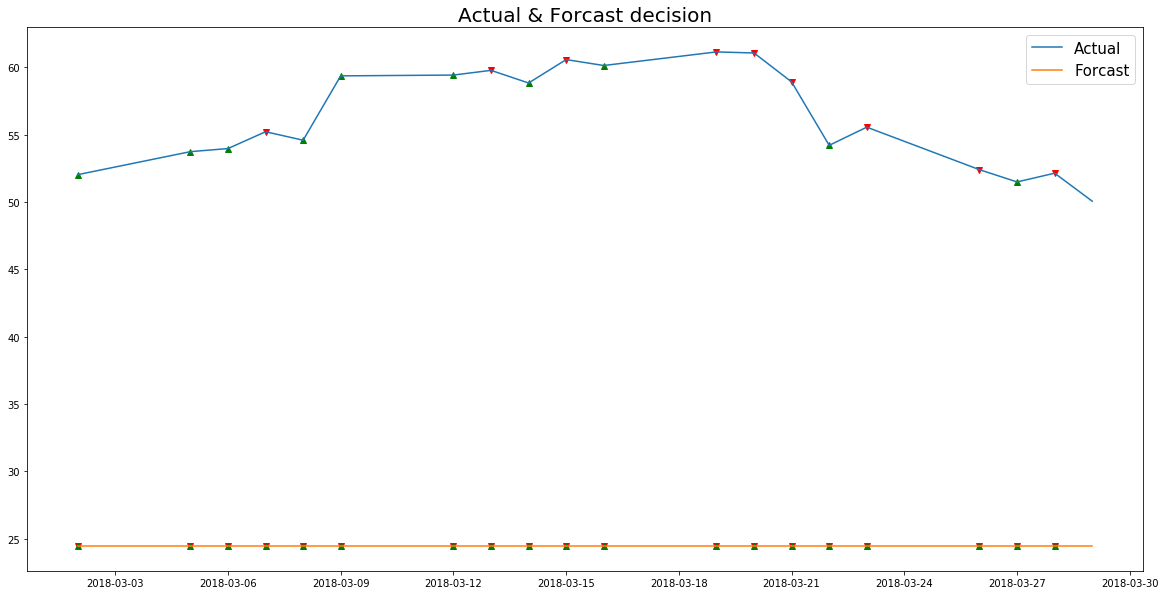

In [25]:
#LassoLars is a regression analysis method
#You wil get two Data Frames 
#1- a_short Data Frame(for the dates that you chose ...start_date,end_date)--->   lassoLars_short
#2-a longData Frame (for the whole period)   --------------------->               lassoLars_df
get_model(X_train,y_train,X_test,y_test, LassoLars,dataFrame, 'lassoLars',start_date ='2018-03-01',end_date ='2018-04-01') 


In [26]:
lassoLars_df[['Actual','Actual_Momentum','Actual_Decision','Optimal_Decision','Pi','Cost','PL_Actual']].head()

,Actual,Actual_Momentum,Actual_Decision,Optimal_Decision,Pi,Cost,PL_Actual
1970-01-01 00:00:00.000000001,46.88,1.90,Hold,Hold,0.0,0.00,0.0
1970-01-01 00:00:00.000000002,45.80,-1.08,Sell,Hold,0.0,0.00,0.0
1970-01-01 00:00:00.000000003,45.55,-0.25,Hold,Hold,0.0,0.00,0.0
1970-01-01 00:00:00.000000004,42.97,-2.58,Hold,Hold,0.0,0.00,0.0
1970-01-01 00:00:00.000000005,43.31,0.34,Buy,Hold,0.0,43.31,0.0




                                            Model Name Bayesianridge


                                        --------------------------
                                             SMAPE 2.233
                                        --------------------------
                                             MASE 2.162
                                        --------------------------
                                             Hit_ratio 52.475
                                        --------------------------


[[0.   0.45 0.55]
 [0.45 0.   0.55]
 [0.24 0.25 0.51]]


<Figure size 432x288 with 0 Axes>

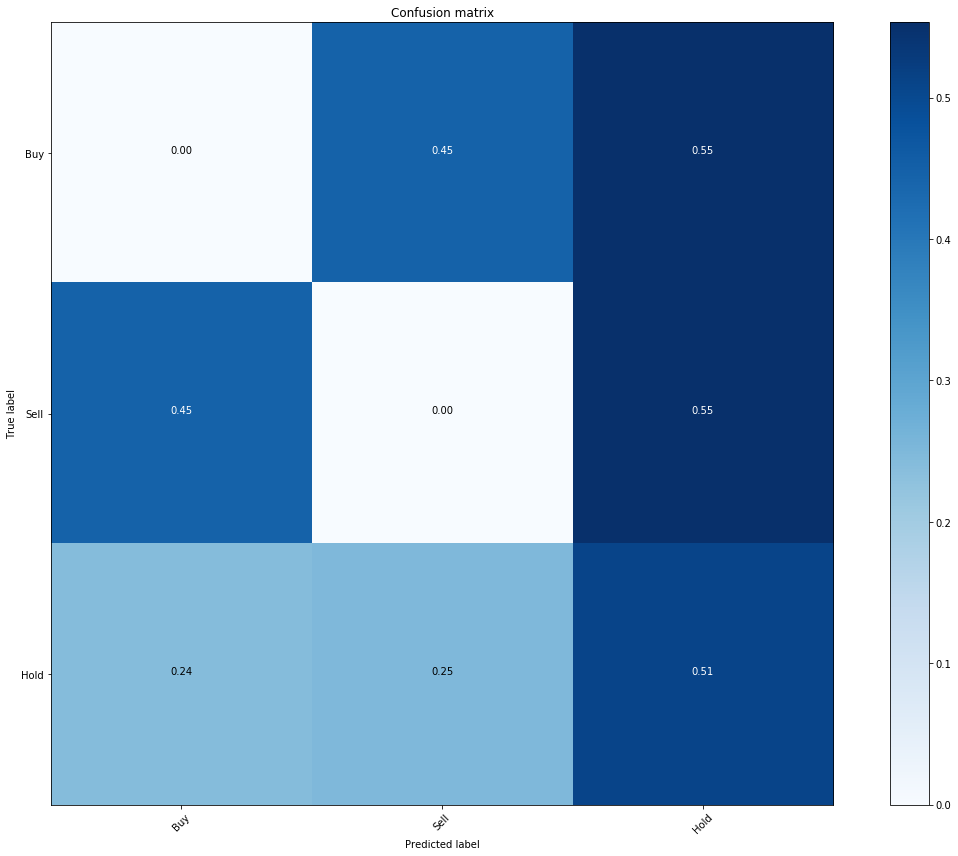

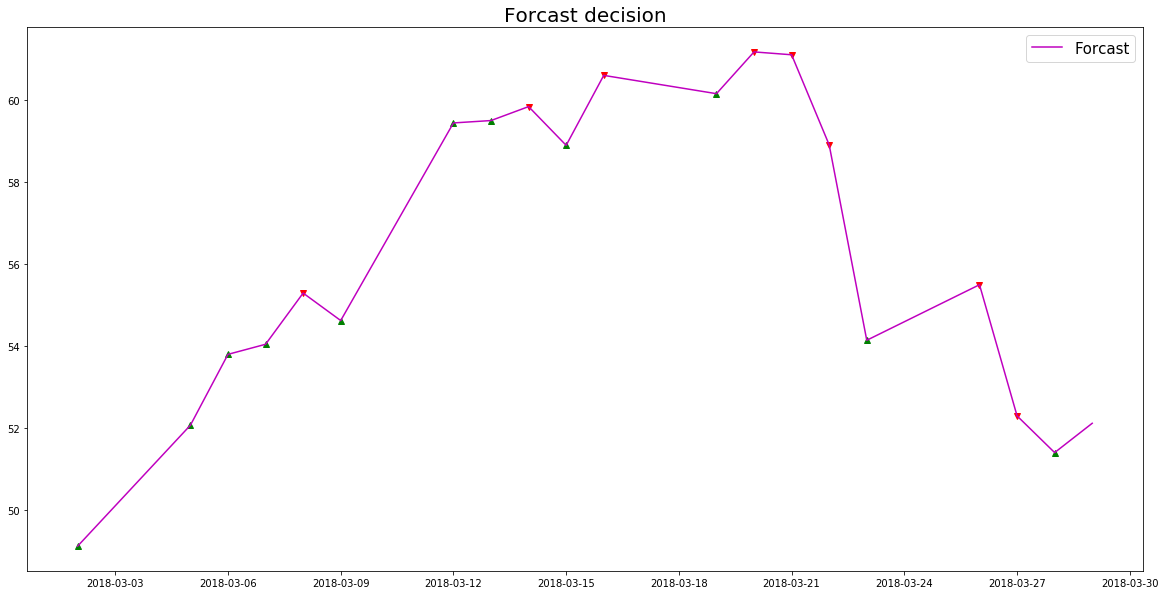

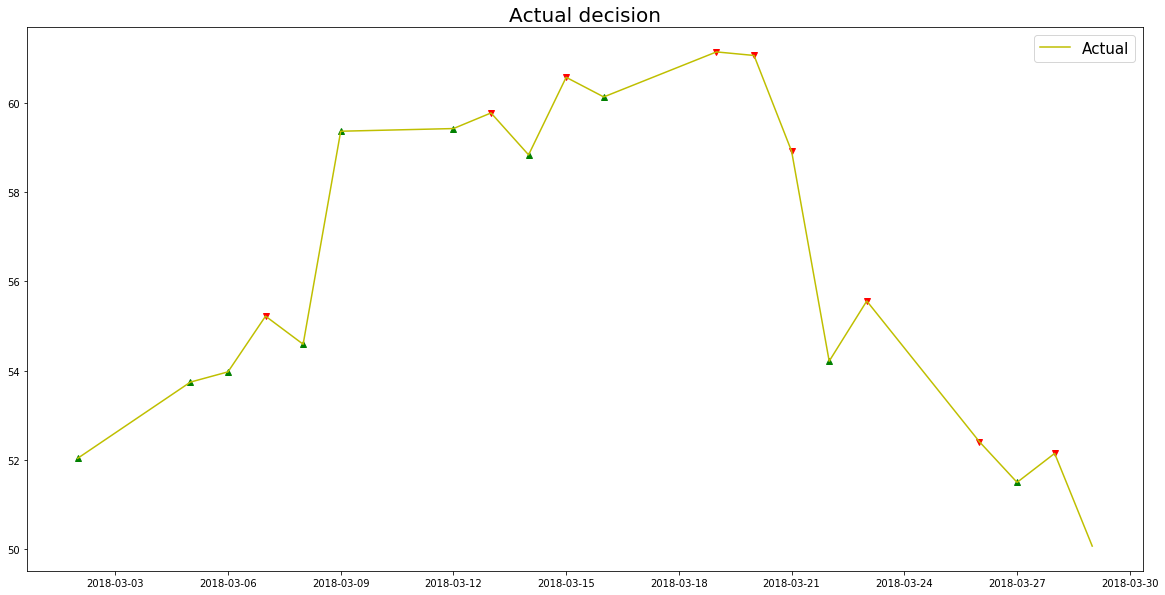

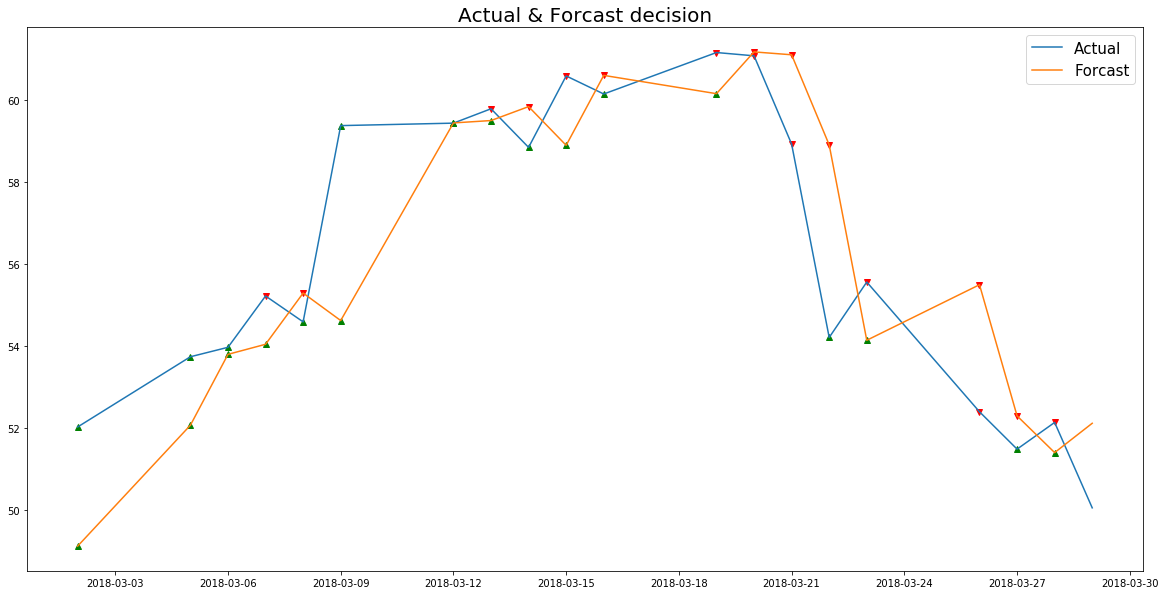

In [27]:
#BayesianRidge is a regression analysis method
#You wil get two Data Frames 
#1- a_short Data Frame(for the dates that you chose ...start_date,end_date)--->   bayesianRidge_short
#2-a longData Frame (for the whole period)   --------------------->               bayesianRidge_df
get_model(X_train,y_train,X_test,y_test, BayesianRidge,dataFrame, 'bayesianRidge',start_date ='2018-03-01',end_date ='2018-04-01') 

In [28]:
bayesianRidge_short[['Actual','Actual_Momentum','Actual_Decision','Optimal_Decision','Pi','Cost','PL_Actual']].head()

,Actual,Actual_Momentum,Actual_Decision,Optimal_Decision,Pi,Cost,PL_Actual
1970-01-01 00:00:00.000000041,52.03,2.92,Buy,Hold,1.0,52.03,0.00
1970-01-01 00:00:00.000000042,53.74,1.71,Hold,Hold,1.0,0.00,0.00
1970-01-01 00:00:00.000000043,53.97,0.23,Hold,Hold,1.0,0.00,0.00
1970-01-01 00:00:00.000000044,55.22,1.25,Hold,Hold,1.0,0.00,0.00
1970-01-01 00:00:00.000000045,54.59,-0.63,Sell,Hold,0.0,0.00,2.56




                                            Model Name Theilsenregressor


                                        --------------------------
                                             SMAPE 2.233
                                        --------------------------
                                             MASE 2.163
                                        --------------------------
                                             Hit_ratio 50.990
                                        --------------------------


[[0.   0.45 0.55]
 [0.47 0.   0.53]
 [0.25 0.27 0.48]]


<Figure size 432x288 with 0 Axes>

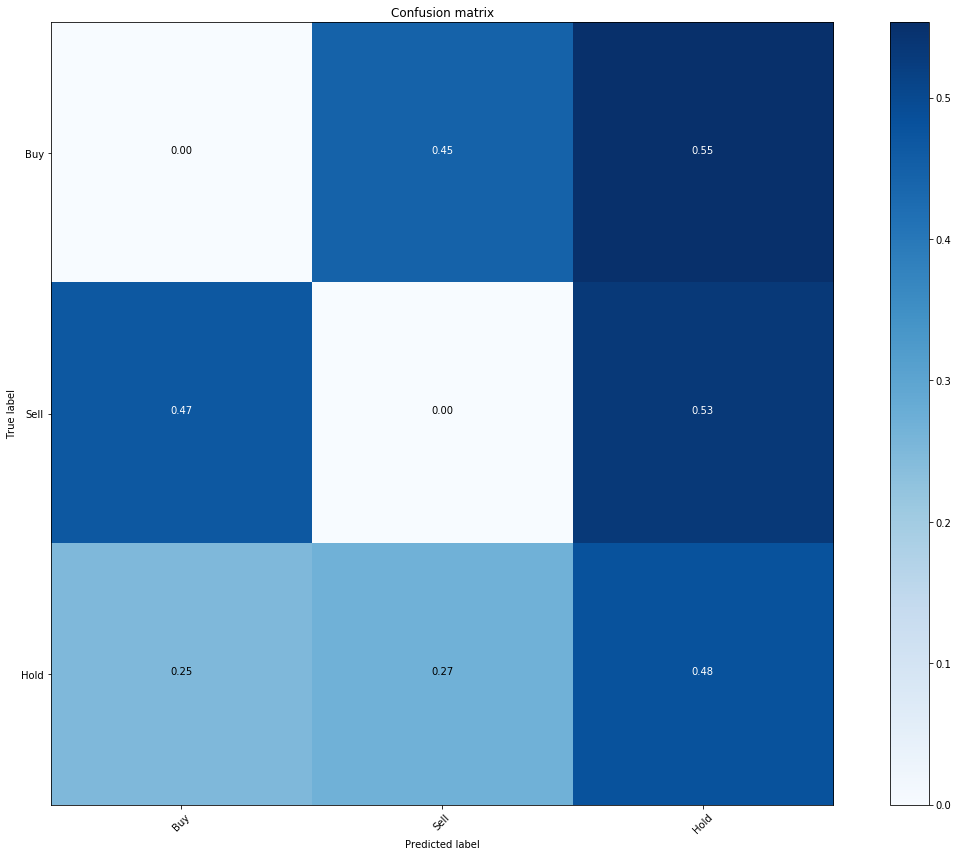

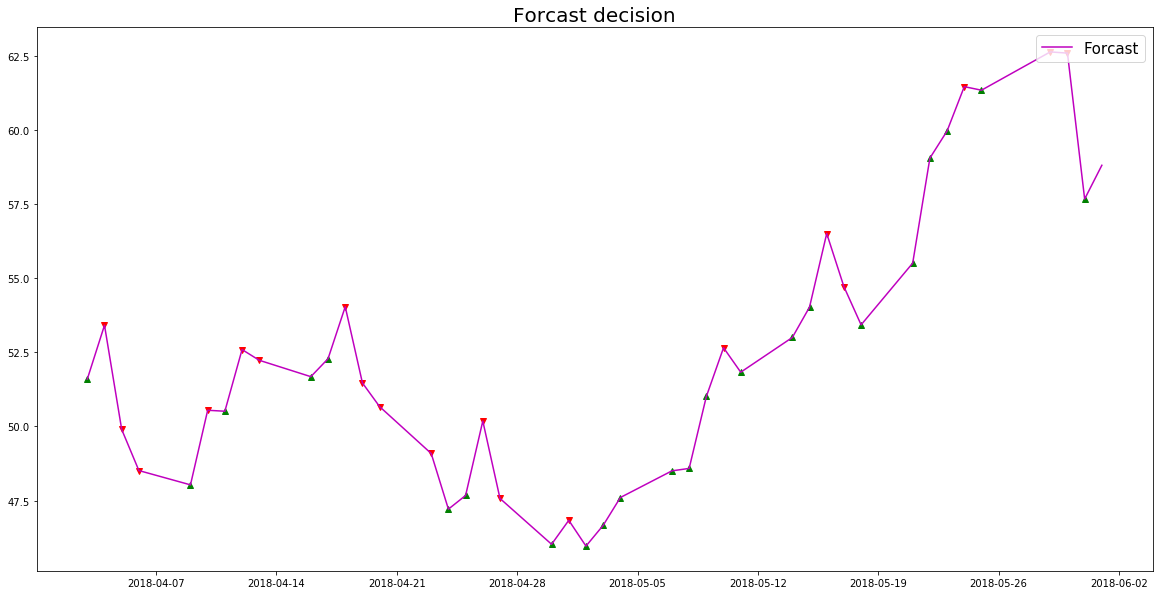

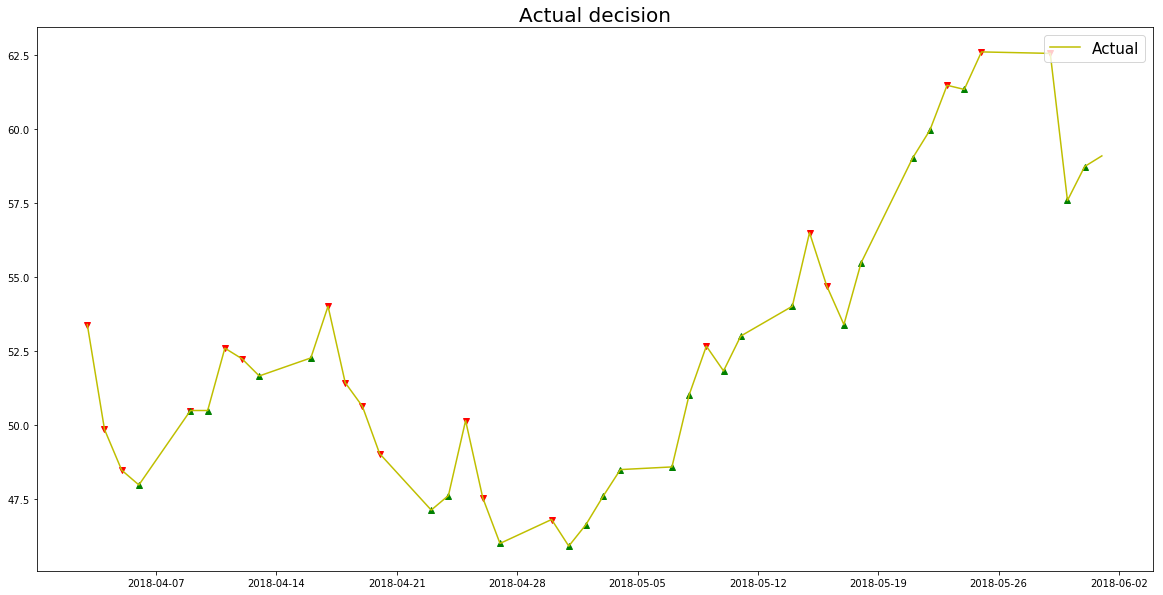

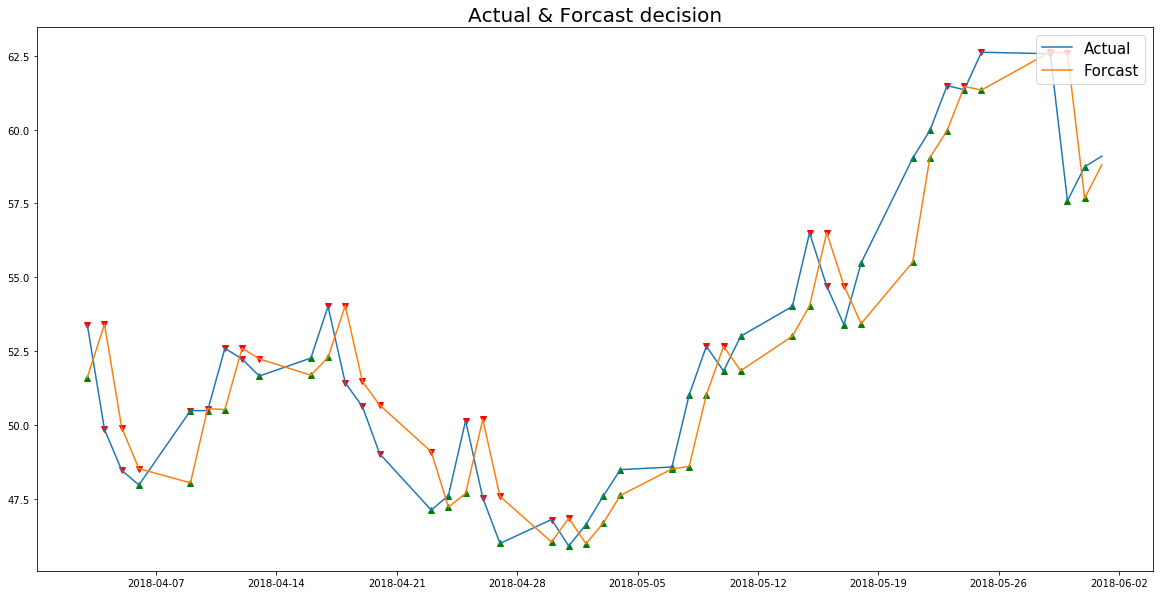

In [29]:
#TheilSenRegressor is a regression analysis method
#You wil get two Data Frames 
#1- a_short Data Frame(for the dates that you chose ...start_date,end_date)--->   theilSenRegressor_short
#2-a longData Frame (for the whole period)   --------------------->               theilSenRegressor_df
from sklearn.linear_model import TheilSenRegressor
get_model(X_train,y_train,X_test,y_test, TheilSenRegressor,dataFrame, 'theilSenRegressor',start_date ='2018-04-01',end_date ='2018-06-01')

In [30]:
dc.reset_index(inplace = True)

In [31]:
dc.head()

,index,MASE,SMAPE
0,Ridge,2.16165,2.23345
1,Lasso,2.14762,2.3064
2,Linearregression,2.16166,2.23619
3,Elasticnet,2.14771,2.30559
4,Lassolars,1.50366,68.2703


In [32]:
#dc.drop('index', axis=1, inplace=True)

In [33]:
#Grade 1:You need to calculate errors for regression forecast of three models, using sMAPEand MASE. Plot in a table and compare models.
Model_val = []
MASE_val = []
SMAPE_val = []
for index, row in dc.iterrows():
    MASE_val.append(dc.MASE[index])
    SMAPE_val.append(dc.SMAPE[index])
    Model_val.append(dc['index'][index])

SMAPE_ = np.array(SMAPE_val).argsort()
SMAPE_ranks = SMAPE_.argsort()

MASE_ = np.array(MASE_val).argsort()
MASE_ranks = MASE_.argsort()
new_df = pd.DataFrame({'Model': Model_val , 'MASE': MASE_val, 'SMAPE': SMAPE_val,'rank_MASE':MASE_ranks,'rank_SMAPE':SMAPE_ranks})
new_df = new_df[new_df.Model != 'Lassolars']
new_df.head()

,Model,MASE,SMAPE,rank_MASE,rank_SMAPE
0,Ridge,2.161648,2.233451,3,1
1,Lasso,2.147621,2.306399,1,5
2,Linearregression,2.161661,2.236187,5,3
3,Elasticnet,2.147714,2.305591,2,4
5,Bayesianridge,2.161648,2.233487,4,2


In [34]:
#new_df['Rank_MASE'] = new_df.groupby('Model')['MASE'].rank(ascending=False)
#new_df['Rank_MASE'] = new_df.groupby('Model')['SMAPE'].rank(ascending=False)

In [35]:
#You can separately plot any regression analysis method of the ones above useinf the mothed name + _df or + _short
#plot_Actual_Forcast(ridge_short)

In [36]:
#plot_Actual_Forcast(lasso_short)

In [37]:
#plot_Actual_Forcast(linearRegression_short)

In [38]:
#http://scikit-learn.org/stable/modules/linear_model.html#perceptron
#Try any new models 
#from sklearn.linear_model import HuberRegressor 
#from sklearn.linear_model import SGDRegressor
#from sklearn.linear_model import PassiveAggressiveRegressor
#get_model(X_train,y_train,X_test,y_test, PassiveAggressiveRegressor,dataFrame, 'passiveAggressiveRegressor',start_date ='2018-08-01',end_date ='2018-09-10')

In [39]:
dc.head()

,index,MASE,SMAPE
0,Ridge,2.16165,2.23345
1,Lasso,2.14762,2.3064
2,Linearregression,2.16166,2.23619
3,Elasticnet,2.14771,2.30559
4,Lassolars,1.50366,68.2703


In [40]:
# ridge_df, lasso_df, linearRegression_df, elasticNet_df, bayesianRidge_df, theilSenRegressor_df

In [41]:
linearRegression_df.sort_index(axis=1).head()

,Actual,Actual_Decision,Actual_Momentum,Cost,Forcast,Forcast_Decision,Forcast_Momentum,Optimal_Decision,PL_Actual,Pi,date
1970-01-01 00:00:00.000000001,46.88,Hold,1.90,0.00,45.027706,Hold,1.326591,Hold,0.0,1.0,2018-01-03
1970-01-01 00:00:00.000000002,45.80,Sell,-1.08,0.00,46.966670,Hold,1.938964,Hold,0.0,0.0,2018-01-04
1970-01-01 00:00:00.000000003,45.55,Hold,-0.25,0.00,45.880156,Sell,-1.086514,Hold,0.0,1.0,2018-01-05
1970-01-01 00:00:00.000000004,42.97,Hold,-2.58,0.00,45.588079,Hold,-0.292077,Hold,0.0,1.0,2018-01-08
1970-01-01 00:00:00.000000005,43.31,Buy,0.34,43.31,42.945311,Hold,-2.642768,Hold,0.0,0.0,2018-01-09


In [42]:
#plot_Forcast(lasso_df)

In [43]:
#plot_Actual(linearRegression_df)

In [44]:
#plot_Actual_Forcast(ridge_df)

In [45]:
#theilSenRegressor_short.head(1)

In [46]:
theilSenRegressor_short[['Actual','Actual_Momentum','Actual_Decision','Optimal_Decision','Pi','Cost','PL_Actual']].head()

,Actual,Actual_Momentum,Actual_Decision,Optimal_Decision,Pi,Cost,PL_Actual
1970-01-01 00:00:00.000000062,53.39,1.84,Buy,Hold,1.0,53.39,0.00
1970-01-01 00:00:00.000000063,49.84,-3.55,Sell,Hold,0.0,0.00,-3.55
1970-01-01 00:00:00.000000064,48.46,-1.38,Hold,Hold,1.0,0.00,-3.55
1970-01-01 00:00:00.000000065,47.96,-0.50,Hold,Hold,1.0,0.00,-3.55
1970-01-01 00:00:00.000000066,50.48,2.52,Buy,Hold,0.0,50.48,-3.55


In [47]:
#count_profit_loss(theilSenRegressor_short)
#theilSenRegressor_short[['Actual','Actual_Decision','Optimal_Decision','Cost','PL_Actual']].head(3)

In [48]:
#theilSenRegressor_df[['Actual','Actual_Decision','PL_Actual']].head(8)

In [49]:
#%matplotlib qt5
#%matplotlib inline
from collections import OrderedDict
from matplotlib import animation
from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import *
def advanced_sol(ff):
    y = ff.Forcast.mean()
    x = matplotlib.dates.date2num(ff.date)
    y_1 = ff["Actual"]
    y_2 = ff["Forcast"]
    ff.plot(x = "date", y=["Actual", "Forcast"] ,figsize=(20,10),linewidth=2)
    plt.axhline(y, c='r', linestyle='--', label='Forcast average',linewidth=2.7)
    dy=-0.6
    m = ff.Forcast.mean()
    data = get_intersections_from_dataframe(ff)
    def animate(data):
        for i in range(len(data)):
            if i < len(data) - 1:
                Y = data[i][1]
                sum_2 = data[i-1][1] - data[i-2][1]
                sum_1 = data[i][1] - data[i-1][1]
                sum1 = data[i+1][1] - data[i][1]
                X = data[i][0]
                X1 = data[i+1][0]
              
                #clean hold green
                if (sum_1 > 0 and sum1 > 0) or (sum_1 < 0 and sum1 < 0 ):
                    continue
                elif sum_1  < 0 and sum1 > 0:
                    plt.fill_between(x,y_1,y_2,where= x >= X ,color='green', interpolate=True)
                    plt.arrow(X, Y + dy, 0.0, - dy - 0.15, width=0.09, alpha=0.7,head_starts_at_zero=False, head_width= 0.2, length_includes_head=True,color='g')
                elif sum_1 > 0 and sum1 < 0:
                    plt.fill_between(x,y_1,y_2,where= x >= X,color='red', interpolate=True)
                    plt.arrow(X, Y - dy, 0.0, dy + 0.15, width=0.09 ,alpha=0.7,head_starts_at_zero=False,head_width= 0.2, length_includes_head=True,color='r')
               
    animate(data)
    plt.legend(loc='upper right',fontsize='15')
    plt.show()

In [50]:
#get_model(X_train,y_train,X_test,y_test, ElasticNet,dataFrame, 'elasticNet',start_date ='2018-04-01',end_date ='2018-06-01')
new_df.head()

,Model,MASE,SMAPE,rank_MASE,rank_SMAPE
0,Ridge,2.161648,2.233451,3,1
1,Lasso,2.147621,2.306399,1,5
2,Linearregression,2.161661,2.236187,5,3
3,Elasticnet,2.147714,2.305591,2,4
5,Bayesianridge,2.161648,2.233487,4,2


In [51]:
#elasticNet_short.at[elasticNet_short[elasticNet_short.date=='2018-04-03'].index.values, 'Actual']
def count_Advanced_PL(dataFrame):
    dataFrame['Advanced_PL'] = 0.0
    dataFrame['Cost'] = 0.0

    for i, (index, row) in enumerate(dataFrame.iterrows()):
        
        current_AD = dataFrame.loc[dataFrame.index[i], 'Advance_decision']
        current_A = dataFrame.loc[dataFrame.index[i], 'Actual'] 
        prev_pl  = dataFrame.loc[dataFrame.index[i-1], 'Advanced_PL']
        if current_AD == 'Buy':
            dataFrame.at[index, 'Cost'] = current_A 
            dataFrame.at[index, 'Advanced_PL'] = prev_pl 
        elif current_AD == 'Hold':
             dataFrame.at[index, 'Advanced_PL'] = prev_pl 
        elif current_AD == 'Sell':
            prev_pl  = dataFrame.loc[dataFrame.index[i-1], 'Advanced_PL']
            curr_val = dataFrame[dataFrame.index <= index].iloc[::-1].Actual.values[:1][0]
            d = dataFrame[dataFrame.index < index].iloc[::-1]
            for j, (indx, rw) in enumerate(d.iterrows()):
                act_dec = d.loc[d.index[j], 'Advance_decision']
                if  act_dec =="Hold":
                    continue
                if act_dec =='Buy':
                    act_val = d.loc[d.index[j], 'Actual']
                    if prev_pl == np.nan:
                        dataFrame.at[index, 'Advanced_PL'] = curr_val - act_val 
                    elif prev_pl != np.nan:
                        
                        output = (curr_val - act_val) + prev_pl
                        dataFrame.at[index, 'Advanced_PL'] = output
                    break
                else:
                    break
    return dataFrame

In [52]:
import matplotlib.dates as dt
def make_decision(data):
    #hold_val=[]
    #buy_val=[]
    #sell_val=[]
    intersections = get_intersections_from_dataframe(data)
    for i in range(len(intersections)):
            if i < len(intersections) - 1:
                Y = intersections[i][1]
                sum_2 = intersections[i-1][1] - intersections[i-2][1]
                sum_1 = intersections[i][1] - intersections[i-1][1]
                sum1 = intersections[i+1][1] - intersections[i][1]
                X = intersections[i][0]
                X1 = intersections[i+1][0]
                date = str(dt.num2date(X).date())
                i = data[data.date == date]
                for index, row in i.iterrows():
                    if (sum_1 > 0 and sum1 > 0) or (sum_1 < 0 and sum1 < 0 ):
                        data.at[index, 'Advance_decision'] = 'Hold'
                        data.at[index, 'Advance_value'] = Y
                        #hold_val.append(hold_val)
                        continue
                    elif sum_1  < 0 and sum1 > 0:
                        data.at[index, 'Advance_decision'] = 'Buy'
                        data.at[index, 'Advance_value'] = Y
                        #buy_val.append(buy_val)
                    elif sum_1 > 0 and sum1 < 0:
                        data.at[index, 'Advance_decision'] = 'Sell'
                        data.at[index, 'Advance_value'] = Y
                        #sell_val.append(Y)
                    else:
                        data.at[index, 'Advance_decision'] = 'Hold'
    data.Advance_decision.fillna('Hold', inplace= True)
    count_Advanced_PL(data)
    return data  
#del elasticNet_short.Advance_decision
#elasticNet_short.Advance_decision.fillna('Hold', inplace= True) 
make_decision(elasticNet_short)
elasticNet_short[['Actual','Advance_decision','Cost','Advanced_PL']].head(10)

,Actual,Advance_decision,Cost,Advanced_PL
1970-01-01 00:00:00.000000022,39.40,Buy,39.4,0.00
1970-01-01 00:00:00.000000023,43.88,Sell,0.0,4.48
1970-01-01 00:00:00.000000024,42.01,Hold,0.0,4.48
1970-01-01 00:00:00.000000025,40.00,Buy,40.0,4.48
1970-01-01 00:00:00.000000026,40.41,Hold,0.0,4.48
1970-01-01 00:00:00.000000027,42.19,Hold,0.0,4.48
1970-01-01 00:00:00.000000028,42.63,Hold,0.0,4.48
1970-01-01 00:00:00.000000029,43.45,Hold,0.0,4.48
1970-01-01 00:00:00.000000030,43.50,Hold,0.0,4.48
1970-01-01 00:00:00.000000031,44.21,Hold,0.0,4.48


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<Figure size 432x288 with 0 Axes>

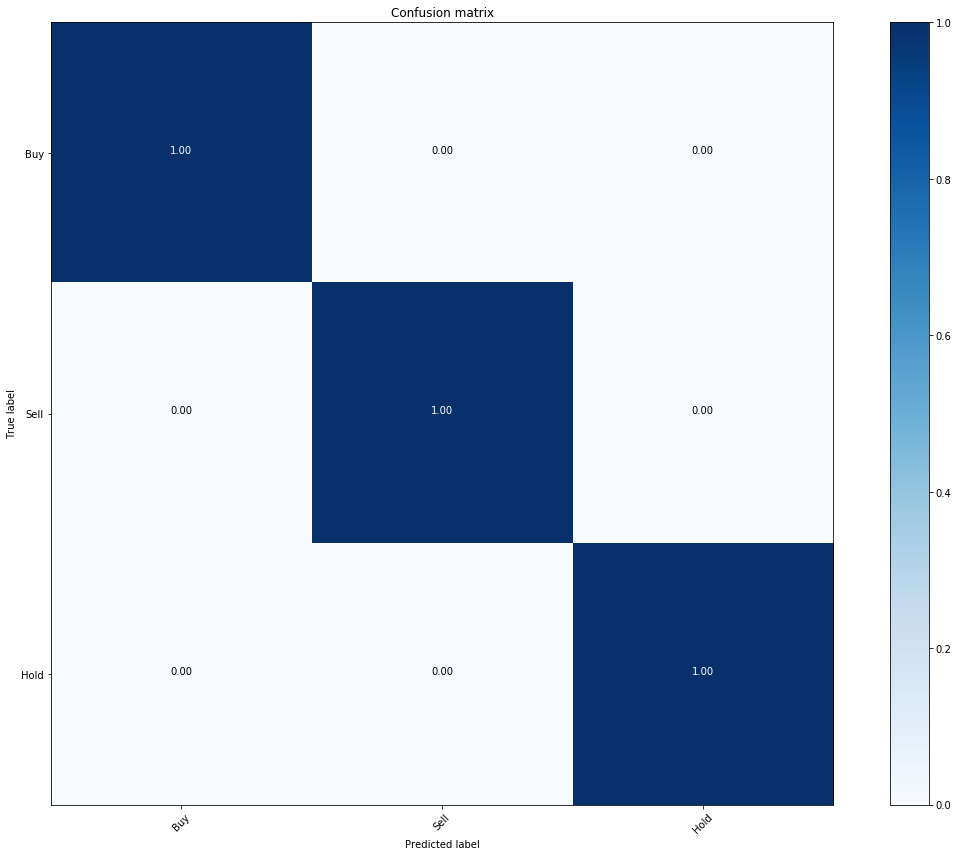

In [53]:
cnf_matrix = confusion_matrix(elasticNet_short.Advance_decision, elasticNet_short.Advance_decision,labels=['Buy', 'Sell', 'Hold'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Buy', 'Sell', 'Hold'],
                      title='Confusion matrix')

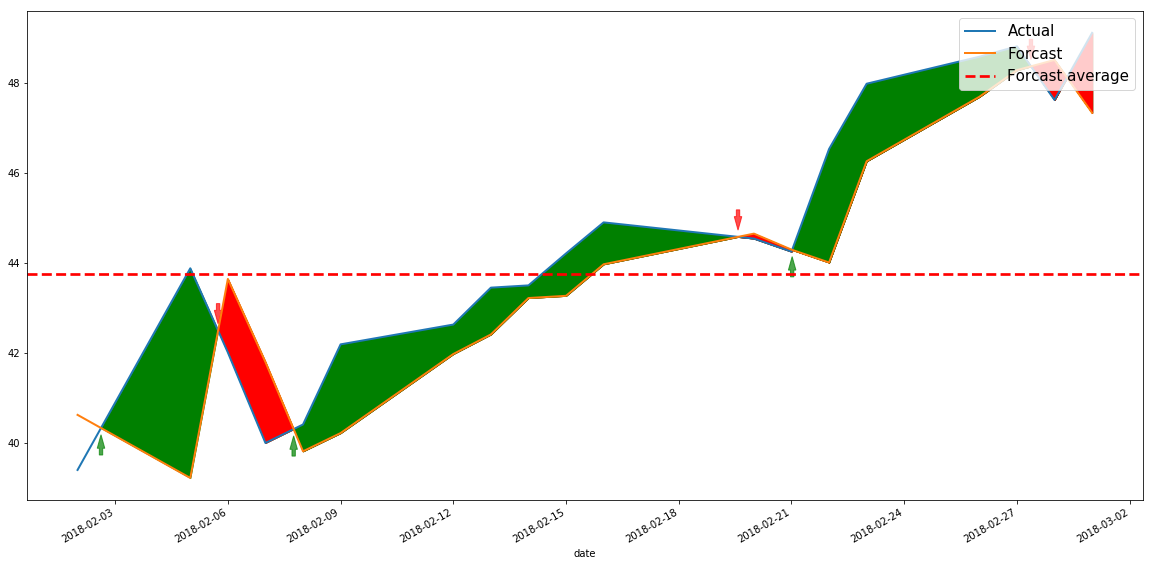

In [54]:
advanced_sol(elasticNet_short)

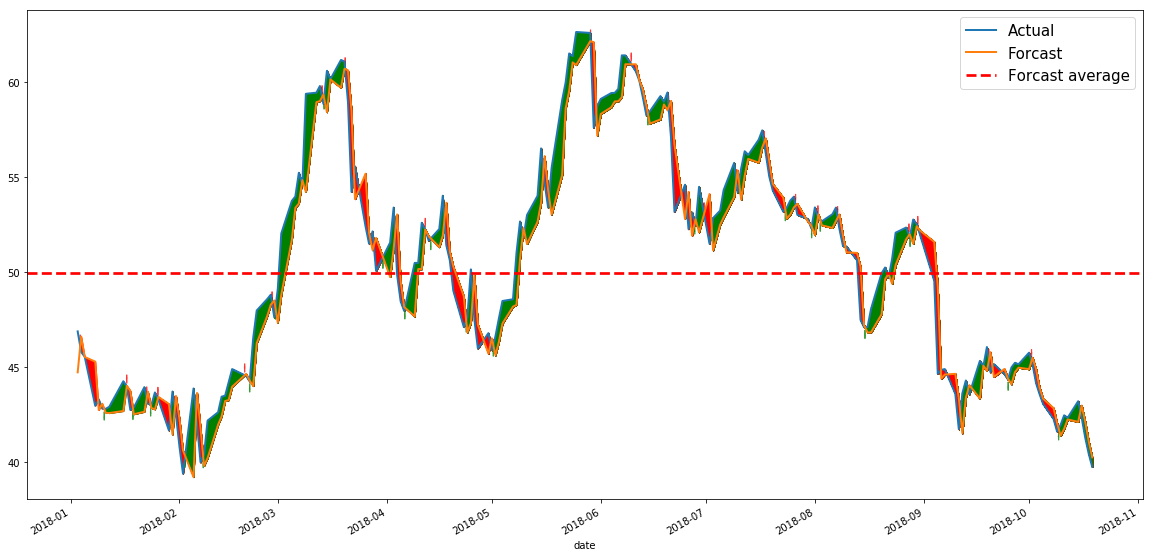

In [55]:
#%matplotlib qt5
advanced_sol(elasticNet_df)

In [56]:
theilSenRegressor_df.head(1)

,Actual,date,Forcast,Actual_Momentum,Forcast_Momentum,Optimal_Decision,Pi,Actual_Decision,Forcast_Decision,PL_Actual,Cost
1970-01-01 00:00:00.000000001,46.88,2018-01-03,44.996376,1.9,1.301275,Hold,1.0,Hold,Hold,0.0,0.0


In [57]:
theilSenRegressor_df.tail(1)

,Actual,date,Forcast,Actual_Momentum,Forcast_Momentum,Optimal_Decision,Pi,Actual_Decision,Forcast_Decision,PL_Actual,Cost
1970-01-01 00:00:00.000000202,39.76,2018-10-19,40.502096,-0.69,-0.844205,Hold,1.0,Hold,Hold,3.46,0.0
